# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [32]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [33]:
def max_element(arr):
    zero_mask = np.concatenate(([False], arr[:-1] == 0)) # Создаём маску элементов, следующих за нулевыми, с помощью сдвига массива
    candidate_elements = arr[zero_mask] # Находим элементы, которые идут после нулей

    if candidate_elements.size == 0:
        return None
    else:
        return np.max(candidate_elements)

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max_element(x))

5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [34]:
def nearest_value(X, v):
    differences = np.abs(X - v) # Вычисляем абсолютные разницы каждого элемента с v
    min_index = np.unravel_index(np.argmin(differences), X.shape) # Находим индекс минимальной разницы
    return X[min_index]

X = np.arange(0, 10).reshape((2, 5))
v = 3.6
print(nearest_value(X, v))

4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [35]:
def scale(X):
    mean = np.mean(X, axis=0) # Вычисляем выборочное среднее по столбцам
    std = np.std(X, axis=0) # Вычисляем стандартное отклонение по столбцам
    std_adjusted = np.where(std == 0, 1, std) # Предотвращаем деление на ноль: для нулевых std присваиваем 1, чтобы не терять данные
    X_scaled = (X - mean) / std_adjusted # Масштабируем матрицу
    return X_scaled

np.random.seed(0)  # для воспроизводимости
X_test = np.random.randint(0, 10, size=(5, 3))
print("Исходная матрица:n", X_test)

X_scaled = scale(X_test)
print("Масштабированная матрица:n", X_scaled)

Исходная матрица:n [[5 0 3]
 [3 7 9]
 [3 5 2]
 [4 7 6]
 [8 8 1]]
Масштабированная матрица:n [[ 0.21566555 -1.88117914 -0.41015156]
 [-0.86266219  0.55738641  1.64060622]
 [-0.86266219 -0.1393466  -0.75194452]
 [-0.32349832  0.55738641  0.61522733]
 [ 1.83315714  0.90575292 -1.09373748]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [36]:
def get_stats(X):
    determinant = np.linalg.det(X) # Вычисляем определитель
    trace = np.trace(X) # Вычисляем след
    min_element = np.min(X)
    max_element = np.max(X)
    frobenius_norm = np.linalg.norm(X, 'fro') # Норма Фробениуса: корень из суммы квадратов элементов
    eigenvalues = np.linalg.eigvals(X)  # Собственные числа (для квадратной матрицы)

    # Обратная матрица, если она существует
    try:
        inverse_matrix = np.linalg.inv(X)
    except np.linalg.LinAlgError:
        inverse_matrix = None  # Матрица сингулярна, обратной нет
    return {'determinant': determinant,'trace': trace,'min_element': min_element,'max_element': max_element,'frobenius_norm': frobenius_norm,'eigenvalues': eigenvalues,'inverse_matrix': inverse_matrix}

# Тестирование на случайной матрице из N(10, 1)
np.random.seed(0)  # Для воспроизводимости
X_test = np.random.normal(10, 1, size=(3, 3))
print("Тестовая матрица:n", X_test)

stats = get_stats(X_test)
for key, value in stats.items():
    print(f"{key}: {value}")


Тестовая матрица:n [[11.76405235 10.40015721 10.97873798]
 [12.2408932  11.86755799  9.02272212]
 [10.95008842  9.84864279  9.89678115]]
determinant: 0.7818319812364621
trace: 33.528391484324075
min_element: 9.02272212012359
max_element: 12.240893199201459
frobenius_norm: 32.46572464904387
eigenvalues: [3.23834750e+01 2.14904498e-02 1.12342601e+00]
inverse_matrix: [[ 36.5667531    6.6479615  -46.62521112]
 [-28.58137887  -4.85001924  36.12769045]
 [-12.01616837  -2.52907069  15.73657777]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [37]:
max_elements = []
for exp_num in range(100):
    A = np.random.randn(10, 10) # Генерируем две матрицы 10×10
    B = np.random.randn(10, 10)
    C = A @ B # Перемножаем матрицы

    max_element = np.max(C)
    max_elements.append(max_element)

max_elements = np.array(max_elements)

mean_max = np.mean(max_elements) # Вычисляем среднее значение и 95-процентную квантиль
quantile_95 = np.quantile(max_elements, 0.95)
print(f"Среднее значение максимальных элементов: {mean_max:.4f}")
print(f"95-процентная квантиль: {quantile_95:.4f}")

Среднее значение максимальных элементов: 8.5473
95-процентная квантиль: 12.6750


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [38]:
import pandas as pd
%matplotlib inline

In [39]:
import numpy as np

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [40]:
df = pd.read_csv('/content/drive/MyDrive/2008.csv')
cancellation_counts = df['CancellationCode'].value_counts() # Анализ причин отмены рейсов

most_common_cancellation = cancellation_counts.index[0] # Частая причина
most_common_count = cancellation_counts.iloc[0]
print(f"Самая частая причина отмены рейсов: {most_common_cancellation}")
print(f"Количество отмен по этой причине: {most_common_count}")

Самая частая причина отмены рейсов: A
Количество отмен по этой причине: 563


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [41]:
# Получение статистики с помощью numpy
distance = df['Distance'].values

mean_distance = np.mean(distance)
min_distance = np.min(distance)
max_distance = np.max(distance)
print(f"Среднее расстояние: {mean_distance:.2f} миль")
print(f"Минимальное расстояние: {min_distance} миль")
print(f"Максимальное расстояние: {max_distance} миль")

Среднее расстояние: 724.51 миль
Минимальное расстояние: 31 миль
Максимальное расстояние: 4962 миль


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [42]:
min_distance = df['Distance'].min() # Находим минимальное расстояние
print(f"Минимальное расстояние: {min_distance} миль")

min_distance_flights = df[df['Distance'] == min_distance] # Находим все рейсы с минимальным расстоянием
print(f"\nКоличество рейсов с минимальным расстоянием: {len(min_distance_flights)}")
print("\nИнформация о рейсах с минимальным расстоянием:")
print(min_distance_flights[['Year', 'Month', 'DayofMonth', 'FlightNum', 'Origin', 'Dest', 'Distance', 'UniqueCarrier']])

Минимальное расстояние: 31 миль

Количество рейсов с минимальным расстоянием: 6

Информация о рейсах с минимальным расстоянием:
       Year  Month  DayofMonth  FlightNum Origin Dest  Distance UniqueCarrier
1116   2008     12          30         65    WRG  PSG        31            AS
6958   2008     12          26         65    WRG  PSG        31            AS
17349  2008      8          18         64    PSG  WRG        31            AS
27534  2008      3          11         64    PSG  WRG        31            AS
46082  2008      8           9         65    WRG  PSG        31            AS
48112  2008      2          28         64    PSG  WRG        31            AS


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [43]:
departure_counts = df['Origin'].value_counts() # Подсчет количества вылетов по аэропортам
busiest_airport = departure_counts.index[0] # Аэропорт с наибольшим количеством вылетов
busiest_count = departure_counts.iloc[0]
print(f"Аэропорт с наибольшим количеством вылетов: {busiest_airport}")
print(f"Количество вылетов: {busiest_count}")

# Создаем справочник аэропортов
airports_info = {
    'ATL': ('Atlanta', 'Georgia'),
    'ORD': ('Chicago', 'Illinois'),
    'DFW': ('Dallas/Fort Worth', 'Texas'),
    'DEN': ('Denver', 'Colorado'),
    'LAX': ('Los Angeles', 'California'),
    'IAH': ('Houston', 'Texas'),
    'PHX': ('Phoenix', 'Arizona'),
    'SFO': ('San Francisco', 'California'),
    'LAS': ('Las Vegas', 'Nevada'),
    'MSP': ('Minneapolis', 'Minnesota'),
    'DTW': ('Detroit', 'Michigan'),
    'SEA': ('Seattle', 'Washington'),
    'MCO': ('Orlando', 'Florida'),
    'BOS': ('Boston', 'Massachusetts'),
    'LGA': ('New York', 'New York'),
    'JFK': ('New York', 'New York'),
    'EWR': ('Newark', 'New Jersey'),
    'CLT': ('Charlotte', 'North Carolina'),
    'PHL': ('Philadelphia', 'Pennsylvania')
}

if busiest_airport in airports_info: # Определяем город аэропорта
    city, state = airports_info[busiest_airport]
    print(f"Аэропорт находится в городе: {city}, штат {state}")
else:
    print(f"Информация о городе для аэропорта {busiest_airport} не найдена в справочнике")

Аэропорт с наибольшим количеством вылетов: ATL
Количество вылетов: 4134
Аэропорт находится в городе: Atlanta, штат Georgia


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [44]:
mean_airtime_by_origin = df.groupby('Origin')['AirTime'].mean() # Группируем по аэропорту вылета и вычисляем среднее время полета

# Находим аэропорт с наибольшим средним временем полета
max_airport = mean_airtime_by_origin.idxmax()
max_airtime = mean_airtime_by_origin.max()

print(f"Аэропорт с наибольшим средним временем полета: {max_airport}")
print(f"Среднее время полета: {max_airtime:.2f} минут")

# Показываем топ-10 аэропортов по среднему времени полета
top_10_airtime = mean_airtime_by_origin.sort_values(ascending=False).head(10)

print("Топ-10 аэропортов по среднему времени полета:")
for airport, airtime in top_10_airtime.items():
    print(f"{airport}: {airtime:.2f} минут")

Аэропорт с наибольшим средним временем полета: SJU
Среднее время полета: 205.20 минут
Топ-10 аэропортов по среднему времени полета:
SJU: 205.20 минут
BQN: 193.95 минут
PSE: 191.88 минут
STT: 185.03 минут
ANC: 165.42 минут
JFK: 162.60 минут
SEA: 154.62 минут
STX: 153.00 минут
EWR: 142.09 минут
ADK: 142.00 минут


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [45]:
df['IsDelayed'] = df['DepDelay'] > 0 # Создаем столбец с признаком задержки

# Группируем по аэропорту и вычисляем статистики
airport_stats = df.groupby('Origin').agg(TotalFlights=('IsDelayed', 'count'),DelayedFlights=('IsDelayed', 'sum'))

# Вычисляем долю задержанных рейсов
airport_stats['DelayRatio'] = airport_stats['DelayedFlights'] / airport_stats['TotalFlights']

# Фильтруем аэропорты с количеством рейсов >= 1000
filtered_airports = airport_stats[airport_stats['TotalFlights'] >= 1000]

# Находим аэропорт с наибольшей долей задержанных рейсов
max_delay_airport = filtered_airports['DelayRatio'].idxmax()
max_delay_ratio = filtered_airports['DelayRatio'].max()
total_flights = filtered_airports.loc[max_delay_airport, 'TotalFlights']
delayed_flights = filtered_airports.loc[max_delay_airport, 'DelayedFlights']

print(f"Аэропорт с наибольшей долей задержанных рейсов: {max_delay_airport}")
print(f"Доля задержанных рейсов: {max_delay_ratio:.3f} ({max_delay_ratio*100:.1f}%)")
print(f"Общее количество рейсов: {total_flights}")
print(f"Количество задержанных рейсов: {delayed_flights}")

Аэропорт с наибольшей долей задержанных рейсов: EWR
Доля задержанных рейсов: 0.511 (51.1%)
Общее количество рейсов: 1389
Количество задержанных рейсов: 710


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [46]:
# Имеются ли в данных пропущенные значения?
print("Анализ пропущенных значений: ")
has_missing_values = df.isnull().any().any()
print(f"1. Имеются ли в данных пропущенные значения? {'Да' if has_missing_values else 'Нет'}")

# Сколько всего пропущенных элементов в таблице "объект-признак"?
total_missing = df.isnull().sum().sum()
print(f"2. Всего пропущенных элементов в таблице: {total_missing}")

# Сколько объектов имеют хотя бы один пропуск?
objects_with_missing = df.isnull().any(axis=1).sum()
print(f"3. Объектов с хотя бы одним пропуском: {objects_with_missing}")
print(f"   Процент объектов с пропусками: {objects_with_missing/len(df)*100:.2f}%")

# Сколько признаков имеют хотя бы одно пропущенное значение?
features_with_missing = df.isnull().any(axis=0).sum()
print(f"4. Признаков с хотя бы одним пропуском: {features_with_missing}")
print(f"   Процент признаков с пропусками: {features_with_missing/len(df.columns)*100:.2f}%")

Анализ пропущенных значений: 
1. Имеются ли в данных пропущенные значения? Да
2. Всего пропущенных элементов в таблице: 355215
3. Объектов с хотя бы одним пропуском: 70000
   Процент объектов с пропусками: 100.00%
4. Признаков с хотя бы одним пропуском: 16
   Процент признаков с пропусками: 53.33%


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [47]:
print("Анализ целевой переменной")

# Предположим, что целевая переменная - DepDelay (задержка вылета)
target_column = 'DepDelay'

# 1. Имеются ли пропущенные значения в целевой переменной?
target_missing = df[target_column].isnull().sum()
print(f"1. Пропущенных значений в целевой переменной '{target_column}': {target_missing}")
print(f"Процент пропусков: {target_missing/len(df)*100:.2f}%\n")

# 2. Анализ объектов с пропущенными значениями целевой переменной
if target_missing > 0:
    missing_target_rows = df[df[target_column].isnull()]

    print("2. Анализ объектов с пропущенной целевой переменной:")
    print(f"Всего таких объектов: {len(missing_target_rows)}")

    # Анализ общих характеристик этих объектов
    print("Характеристики объектов с пропущенной целевой переменной:")

    # Проверяем статус отмены рейсов
    if 'Cancelled' in df.columns:
        cancelled_count = missing_target_rows['Cancelled'].sum()
        print(f"   - Отмененных рейсов среди них: {cancelled_count}")

    # Проверяем коды отмены
    if 'CancellationCode' in df.columns:
        cancellation_codes = missing_target_rows['CancellationCode'].value_counts()
        print(f"   - Распределение по кодам отмены:")
        for code, count in cancellation_codes.items():
            print(f"     * {code}: {count} рейсов")

    # Анализ других пропущенных значений в этих строках
    print(f"Другие пропуски в этих объектах:")
    other_missing = missing_target_rows.isnull().sum()
    other_missing = other_missing[other_missing > 0]
    for col, count in other_missing.items():
        if col != target_column:
            print(f"   - {col}: {count} пропусков")

# 3. Анализ рейсов с нулевой задержкой
zero_delay_count = len(df[df[target_column] == 0])
print(f"\n3. Рейсов с нулевой задержкой (DepDelay = 0): {zero_delay_count}")
print(f"   Процент от общего числа: {zero_delay_count/len(df)*100:.2f}%")

# ОБРАБОТКА ДАННЫХ
print("Обработка данных")

# Создаем копию данных для обработки
df_processed = df.copy()

# Исключаем объекты с пропущенной целевой переменной
initial_count = len(df_processed)
df_processed = df_processed.dropna(subset=[target_column])
after_missing_removal = len(df_processed)
print(f"Удалено объектов с пропущенной целевой переменной: {initial_count - after_missing_removal}")

# Исключаем объекты с нулевой задержкой
df_processed = df_processed[df_processed[target_column] != 0]
after_zero_removal = len(df_processed)
print(f"Удалено объектов с нулевой задержкой: {after_missing_removal - after_zero_removal}")

print(f"Итоговый размер выборки: {len(df_processed)} объектов")

# Анализ признаков для возможного исключения
print("\nАнализ признаков для исключения:")

# Признаки, которые могут быть неинформативными или избыточными
potential_exclude = []
if 'CancellationCode' in df_processed.columns:
    # Если все рейсы выполнены (не отменены), CancellationCode будет постоянным
    if df_processed['CancellationCode'].nunique() <= 1:
        potential_exclude.append('CancellationCode')
        print(f"- CancellationCode: может быть исключен (мало уникальных значений)")

if 'Cancelled' in df_processed.columns:
    # Если все рейсы выполнены, признак Cancelled постоянный
    if df_processed['Cancelled'].nunique() <= 1:
        potential_exclude.append('Cancelled')
        print(f"- Cancelled: может быть исключен (все рейсы выполнены)")

# ВЫДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ И МАТРИЦЫ ПРИЗНАКОВ
print("Формирование финального набора данных")

# Исключаем выбранные признаки
if potential_exclude:
    df_processed = df_processed.drop(columns=potential_exclude)
    print(f"Исключены признаки: {potential_exclude}")

# Выделяем целевую переменную
y = df_processed[target_column].values
X = df_processed.drop(columns=[target_column])

print(f"Финальные размеры:")
print(f"Матрица признаков X: {X.shape}")
print(f"Вектор целевой переменной y: {y.shape}")
print(f"Уникальных значений в y: {len(np.unique(y))}")

Анализ целевой переменной
1. Пропущенных значений в целевой переменной 'DepDelay': 1399
Процент пропусков: 2.00%

2. Анализ объектов с пропущенной целевой переменной:
Всего таких объектов: 1399
Характеристики объектов с пропущенной целевой переменной:
   - Отмененных рейсов среди них: 1399
   - Распределение по кодам отмены:
     * A: 558 рейсов
     * B: 542 рейсов
     * C: 299 рейсов
Другие пропуски в этих объектах:
   - DepTime: 1399 пропусков
   - ArrTime: 1399 пропусков
   - TailNum: 820 пропусков
   - ActualElapsedTime: 1399 пропусков
   - CRSElapsedTime: 4 пропусков
   - AirTime: 1399 пропусков
   - ArrDelay: 1399 пропусков
   - TaxiIn: 1399 пропусков
   - TaxiOut: 1399 пропусков
   - CarrierDelay: 1399 пропусков
   - WeatherDelay: 1399 пропусков
   - NASDelay: 1399 пропусков
   - SecurityDelay: 1399 пропусков
   - LateAircraftDelay: 1399 пропусков

3. Рейсов с нулевой задержкой (DepDelay = 0): 5197
   Процент от общего числа: 7.42%
Обработка данных
Удалено объектов с пропущенн

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [48]:
print("Преобразование временных признаков")
time_columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'] # Список временных признаков для преобразования

available_time_columns = [col for col in time_columns if col in df.columns] # Проверяем, какие из этих признаков присутствуют в данных
print(f"Признаки для преобразования: {available_time_columns}")

def split_time(time_value): # Функция для преобразования времени
    if pd.isna(time_value):
        return np.nan, np.nan

    time_int = int(time_value)
    hours = time_int // 100
    minutes = time_int % 100

    return hours, minutes

df_transformed = df.copy()

# Преобразуем каждый временной признак
for time_col in available_time_columns:
    print(f"Преобразование признака {time_col}:")

    # Применяем функцию преобразования
    split_results = df_transformed[time_col].apply(lambda x: pd.Series(split_time(x), index=[f'{time_col}_Hour', f'{time_col}_Minute']))

    # Добавляем новые признаки
    df_transformed = pd.concat([df_transformed, split_results], axis=1)

    # Исключаем исходный признак
    df_transformed = df_transformed.drop(columns=[time_col])

    # Проверяем результаты преобразования
    print(f"  Созданы признаки: {f'{time_col}_Hour'}, {f'{time_col}_Minute'}")
    print(f"  Пример преобразования:")

    # Показываем несколько примеров преобразования
    sample_data = df[time_col].dropna().head(3)
    for original in sample_data:
        hours, minutes = split_time(original)
        print(f"    {original} -> Часы: {hours}, Минуты: {minutes}")

# Проверяем пропуски в новых признаках
print(f"Проверка пропусков после преобразования")
for time_col in available_time_columns:
    hour_col = f'{time_col}_Hour'
    minute_col = f'{time_col}_Minute'

    original_missing = df[time_col].isnull().sum()
    hour_missing = df_transformed[hour_col].isnull().sum()
    minute_missing = df_transformed[minute_col].isnull().sum()

    print(f"{time_col}:")
    print(f"  Исходный признак: {original_missing} пропусков")
    print(f"  {hour_col}: {hour_missing} пропусков")
    print(f"  {minute_col}: {minute_missing} пропусков")

    # Проверяем согласованность пропусков
    if original_missing == hour_missing == minute_missing:
        print(f"Пропуски согласованы")
    else:
        print(f"Несовпадение количества пропусков!")

# Проверяем корректность диапазонов значений
print(f"Проверка диапазонов значений")
for time_col in available_time_columns:
    hour_col = f'{time_col}_Hour'
    minute_col = f'{time_col}_Minute'

    print(f"\n{time_col}:")
    print(f"  {hour_col}: min={df_transformed[hour_col].min()}, max={df_transformed[hour_col].max()}")
    print(f"  {minute_col}: min={df_transformed[minute_col].min()}, max={df_transformed[minute_col].max()}")

# Информация о финальном наборе данных
print(f"Итоговая информация")
print(f"Исходное количество признаков: {len(df.columns)}")
print(f"Количество признаков после преобразования: {len(df_transformed.columns)}")
print(f"Количество строк: {len(df_transformed)}")

# Список новых признаков
new_time_columns = []
for time_col in available_time_columns:
    new_time_columns.extend([f'{time_col}_Hour', f'{time_col}_Minute'])

print(f"Новые временные признаки: {new_time_columns}")

print(f"Пример преобразованных данных")
sample_columns = []
for time_col in available_time_columns[:2]:  # первые 2 преобразованных признака
    sample_columns.extend([f'{time_col}_Hour', f'{time_col}_Minute'])
print(df_transformed[sample_columns].head(10))

Преобразование временных признаков
Признаки для преобразования: ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
Преобразование признака DepTime:
  Созданы признаки: DepTime_Hour, DepTime_Minute
  Пример преобразования:
    2111.0 -> Часы: 21, Минуты: 11
    1426.0 -> Часы: 14, Минуты: 26
    1143.0 -> Часы: 11, Минуты: 43
Преобразование признака CRSDepTime:
  Созданы признаки: CRSDepTime_Hour, CRSDepTime_Minute
  Пример преобразования:
    2055 -> Часы: 20, Минуты: 55
    1410 -> Часы: 14, Минуты: 10
    1145 -> Часы: 11, Минуты: 45
Преобразование признака ArrTime:
  Созданы признаки: ArrTime_Hour, ArrTime_Minute
  Пример преобразования:
    2308.0 -> Часы: 23, Минуты: 8
    1730.0 -> Часы: 17, Минуты: 30
    1501.0 -> Часы: 15, Минуты: 1
Преобразование признака CRSArrTime:
  Созданы признаки: CRSArrTime_Hour, CRSArrTime_Minute
  Пример преобразования:
    2300 -> Часы: 23, Минуты: 0
    1728 -> Часы: 17, Минуты: 28
    1520 -> Часы: 15, Минуты: 20
Проверка пропусков после преобразо

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
print("Анализ и исключение сильно коррелирующих признаков")
target_column = 'DepDelay' # Предположим, что целевая переменная - DepDelay

df_processed = df.copy()

# 1. Исключаем явно указанные признаки
exclude_always = ['TailNum', 'Year']
df_processed = df_processed.drop(columns=[col for col in exclude_always if col in df_processed.columns])
print(f"Исключены явно указанные признаки: {exclude_always}")

# 2. Выделяем только числовые признаки для анализа корреляции
numeric_columns = df_processed.select_dtypes(include=[np.number]).columns.tolist()

if target_column not in numeric_columns:
    print(f"Целевая переменная '{target_column}' не числовая или отсутствует")
    # Если DepDelay не числовая, попробуем преобразовать
    if target_column in df_processed.columns:
        df_processed[target_column] = pd.to_numeric(df_processed[target_column], errors='coerce')
        numeric_columns = df_processed.select_dtypes(include=[np.number]).columns.tolist()
print(f"Числовых признаков для анализа: {len(numeric_columns)}")

# 3. Анализ корреляции с целевой переменной
print(f"Анализ корреляции с целевой переменной'{target_column}':")
if target_column in numeric_columns:
    df_numeric = df_processed[numeric_columns].copy() # Создаем DataFrame только с числовыми признаками
    correlations = df_numeric.corr()[target_column].sort_values(ascending=False) # Вычисляем корреляции с целевой переменной
    print("Признаки с наибольшей корреляцией с целевой переменной:")
    for feature, corr in correlations.head(10).items():
        if feature != target_column:
            print(f"  {feature}: {corr:.3f}")

# 4. Анализ мультиколлинеарности
print(f"Анализ мультиколлинеарности:")
if target_column in numeric_columns:
    corr_matrix = df_numeric.corr() # Вычисляем матрицу корреляций между признаками

    # Находим пары признаков с высокой корреляцией (> 0.8)
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.8:
                high_corr_pairs.append((corr_matrix.columns[i],corr_matrix.columns[j], corr_matrix.iloc[i, j]))

    print(f"Найдено пар признаков с корреляцией > 0.8: {len(high_corr_pairs)}")
    for feat1, feat2, corr in high_corr_pairs[:10]:  # Показываем первые 10 пар
        print(f"  {feat1} - {feat2}: {corr:.3f}")

# 5. Исключение сильно коррелирующих признаков
print(f"Обоснование исключение признаков:")
exclude_reasoning = []

""" Признаки, напрямую связанные с целевой переменной или содержащие "утечку" данных"""
leaky_features = [
    'ArrDelay',           # Задержка прибытия напрямую зависит от задержки вылета
    'ArrTime',            # Время прибытия содержит информацию о задержке
    'ActualElapsedTime',  # Фактическое время полета зависит от задержки
    'AirTime',            # Время в воздухе зависит от задержки
]

""" Признаки, дублирующие информацию или сильно коррелирующие """
correlated_features = [
    'CRSArrTime',         # Плановое время прибытия сильно коррелирует с CRSDepTime
    'CRSElapsedTime',     # Плановое время полета коррелирует с Distance
]

for feature in leaky_features + correlated_features:
    if feature in df_processed.columns:
        exclude_reasoning.append(feature)
        if feature in leaky_features:
            print(f"  - {feature}: содержит 'утечку' информации о целевой переменной")
        else:
            print(f"  - {feature}: сильно коррелирует с другими признаками")

# Исключаем выбранные признаки
features_to_exclude = list(set(exclude_reasoning))
df_final = df_processed.drop(columns=[col for col in features_to_exclude if col in df_processed.columns])
print(f"Исключены признаки: {features_to_exclude}")

print(f"Финальная проверка:")
print(f"Исходное количество признаков: {len(df.columns)}")
print(f"Количество признаков после обработки: {len(df_final.columns)}")
print(f"Исключено признаков: {len(df.columns) - len(df_final.columns)}")
numeric_final = df_final.select_dtypes(include=[np.number]).columns.tolist() # Разделяем на числовые и категориальные признаки
categorical_final = df_final.select_dtypes(include=['object']).columns.tolist()

print(f"Оставшиеся числовые признаки ({len(numeric_final)}):")
for i, col in enumerate(numeric_final, 1):
    print(f"  {i:2d}. {col}")
print(f"Оставшиеся категориальные признаки ({len(categorical_final)}):")
for i, col in enumerate(categorical_final, 1):
    print(f"  {i:2d}. {col}")

# Информация о целевой переменной
if target_column in df_final.columns:
    print(f"Информация о целевой переменной:")
    print(f"  Название: {target_column}")
    print(f"  Тип: {df_final[target_column].dtype}")
    print(f"  Пропуски: {df_final[target_column].isnull().sum()}")
    print(f"  Уникальных значений: {df_final[target_column].nunique()}")
    print(f"  Статистика:")
    print(f"    Min: {df_final[target_column].min()}")
    print(f"    Max: {df_final[target_column].max()}")
    print(f"    Mean: {df_final[target_column].mean():.2f}")
    print(f"    Std: {df_final[target_column].std():.2f}")

Анализ и исключение сильно коррелирующих признаков
Исключены явно указанные признаки: ['TailNum', 'Year']
Числовых признаков для анализа: 23
Анализ корреляции с целевой переменной'DepDelay':
Признаки с наибольшей корреляцией с целевой переменной:
  ArrDelay: 0.930
  LateAircraftDelay: 0.558
  CarrierDelay: 0.536
  WeatherDelay: 0.240
  DepTime: 0.198
  NASDelay: 0.162
  CRSDepTime: 0.138
  CRSArrTime: 0.133
  TaxiOut: 0.098
Анализ мультиколлинеарности:
Найдено пар признаков с корреляцией > 0.8: 9
  DepTime - CRSDepTime: 0.964
  ArrTime - CRSArrTime: 0.861
  ActualElapsedTime - CRSElapsedTime: 0.980
  ActualElapsedTime - AirTime: 0.985
  ActualElapsedTime - Distance: 0.965
  CRSElapsedTime - AirTime: 0.988
  CRSElapsedTime - Distance: 0.983
  AirTime - Distance: 0.983
  ArrDelay - DepDelay: 0.930
Обоснование исключение признаков:
  - ArrDelay: содержит 'утечку' информации о целевой переменной
  - ArrTime: содержит 'утечку' информации о целевой переменной
  - ActualElapsedTime: содержит 

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

1. Преобразование временных признаков...
   Временные признаки преобразованы
2. Подготовка матрицы признаков X...
   Размер матрицы X: (70000, 29)
   Количество признаков: 29
3. Построение гистограмм для анализа распределений...


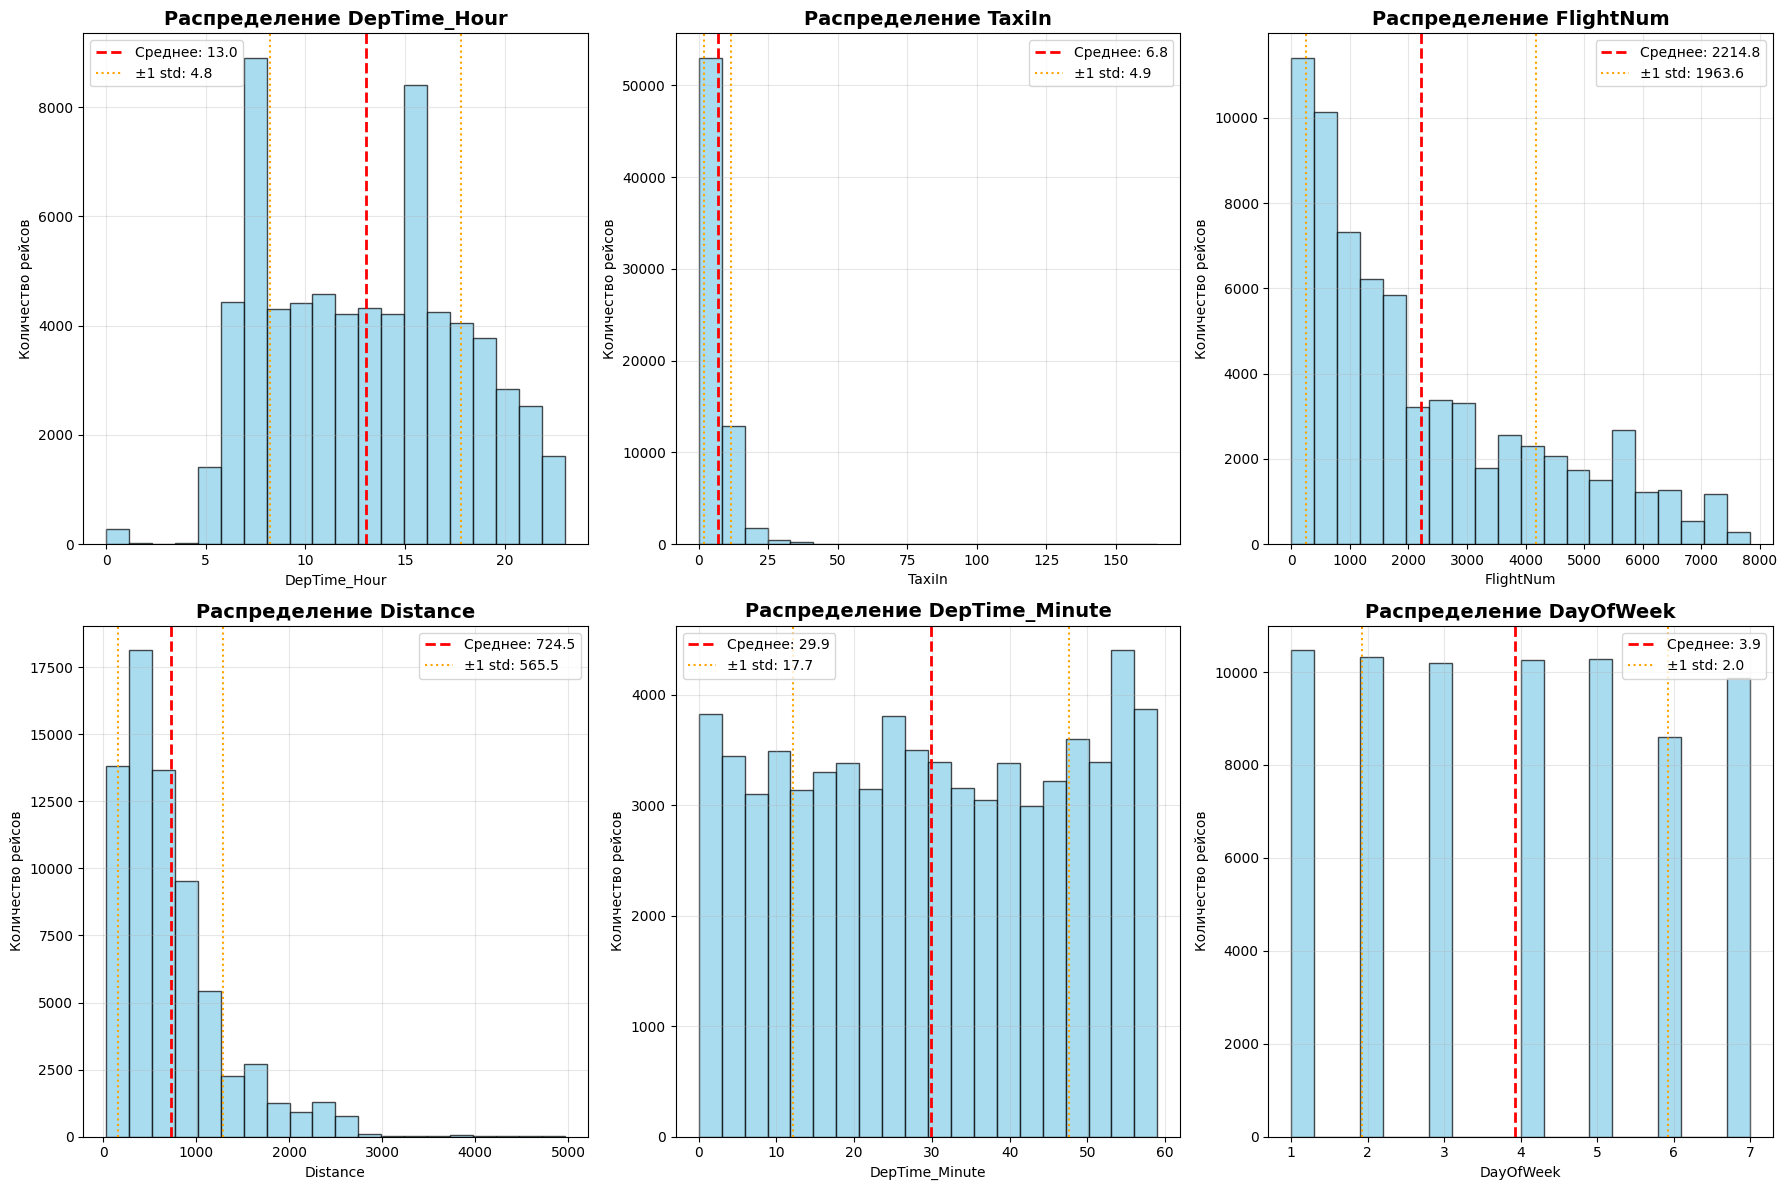

4. Детальный анализ распределений:

--- DepTime_Hour ---
Диапазон: 0.0 - 23.0
Среднее: 13.01
Стандартное отклонение: 4.78
Медиана: 13.0
Пропуски: 1402
Выбросы: 0 (0.0%)

--- TaxiIn ---
Диапазон: 0.0 - 165.0
Среднее: 6.85
Стандартное отклонение: 4.88
Медиана: 6.0
Пропуски: 1556
Выбросы: 3745 (5.3%)

--- FlightNum ---
Диапазон: 1 - 7828
Среднее: 2214.75
Стандартное отклонение: 1963.61
Медиана: 1562.0
Пропуски: 0
Выбросы: 0 (0.0%)

5. Визуализация проблемы разных масштабов...


/tmp/ipython-input-3847471350.py:99: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labels)


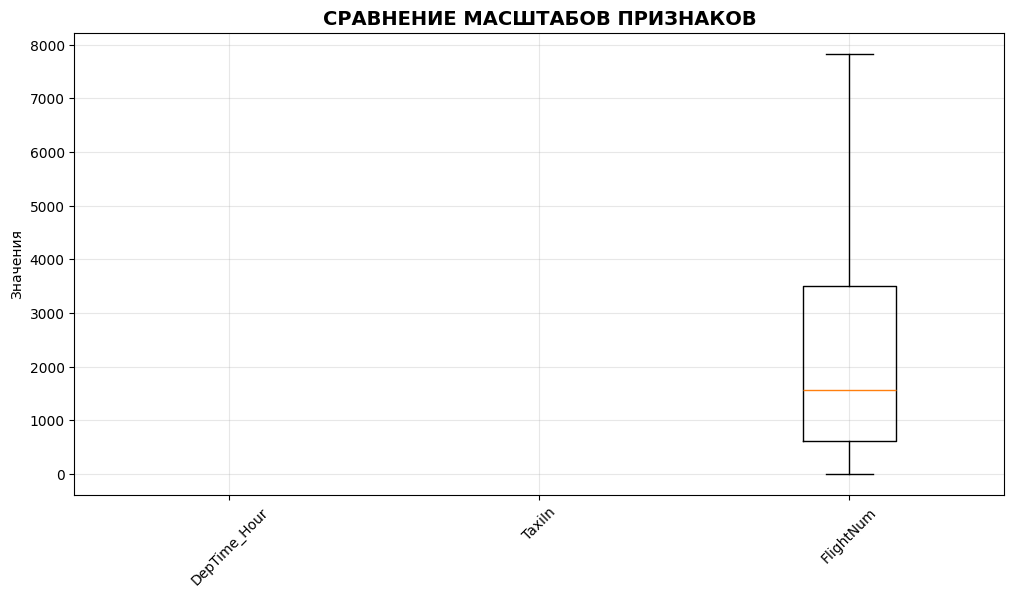


6. Демонстрация эффекта масштабирования...


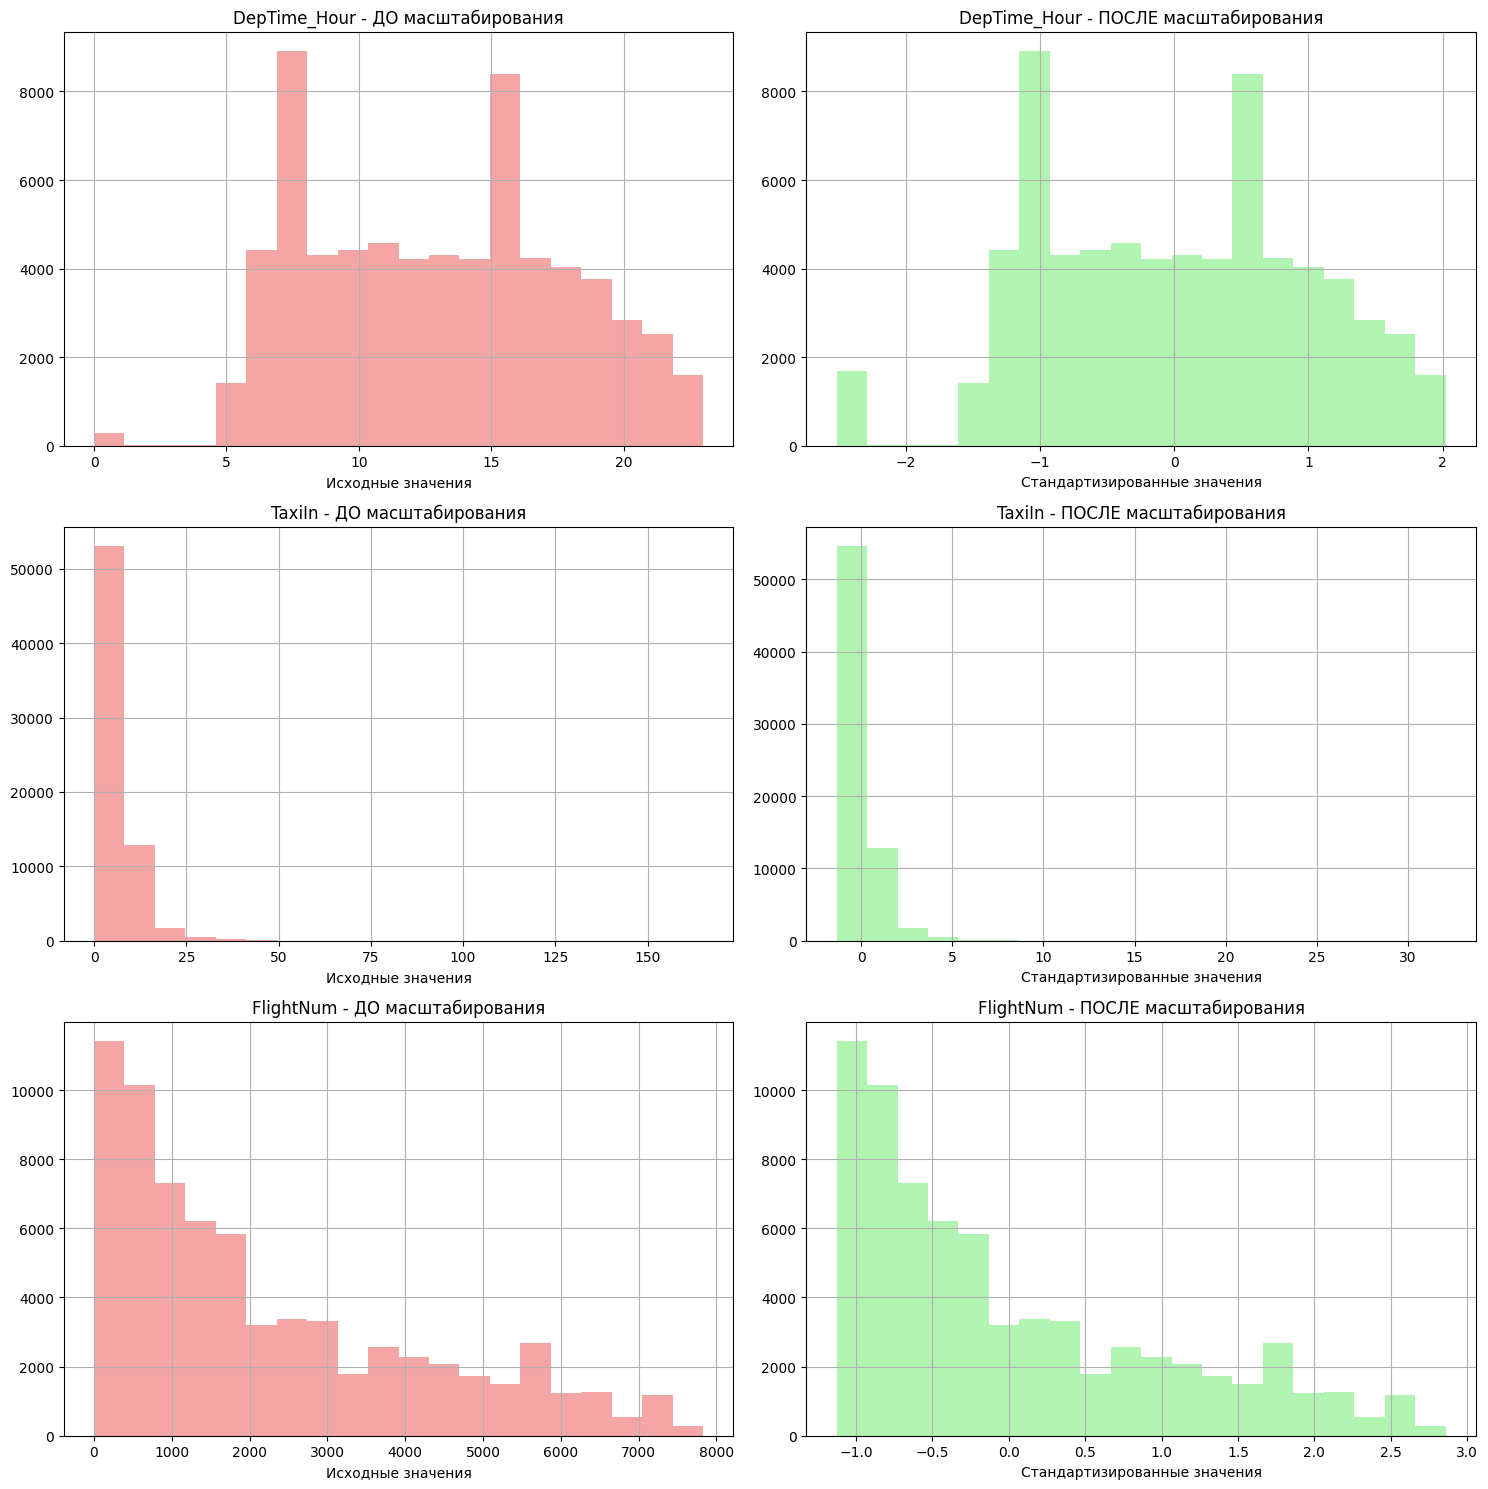


ВЫВОДЫ О НЕОБХОДИМОСТИ МАСШТАБИРОВАНИЯ:

ПРОБЛЕМЫ БЕЗ МАСШТАБИРОВАНИЯ:
1. РАЗНЫЕ ДИАПАЗОНЫ ЗНАЧЕНИЙ:
   - DepTime_Hour: диапазон 23
   - TaxiIn: диапазон 165
   - FlightNum: диапазон 7827

2. РАЗНЫЕ СТАНДАРТНЫЕ ОТКЛОНЕНИЯ:
   - DepTime_Hour: std = 4.78
   - TaxiIn: std = 4.88
   - FlightNum: std = 1963.61

3. ПОСЛЕДСТВИЯ ДЛЯ МОДЕЛЕЙ МАШИННОГО ОБУЧЕНИЯ:
   - Признаки с большими значениями (FlightNum) ДОМИНИРУЮТ
   - Градиентный спуск СХОДИТСЯ МЕДЛЕННО
   - Линейные модели дают СМЕЩЕННЫЕ ОЦЕНКИ
   - Метрики расстояния в k-NN, SVM ИСКАЖАЮТСЯ

РЕШЕНИЕ - МАСШТАБИРОВАНИЕ:
   - StandardScaler: (x - mean) / std
   - Все признаки получают mean ≈ 0, std ≈ 1
   - Сохраняется форма распределения
   - Устраняется доминирование признаков

Теперь команды будут работать:
X['DepTime_Hour'].hist(bins=20)
X['TaxiIn'].hist(bins=20)
X['FlightNum'].hist(bins=20)


In [51]:
from sklearn.preprocessing import StandardScaler
print("1. Преобразование временных признаков...")
def create_time_features(df):
    """Создает признаки часа и минуты из временных признаков формата HHMM"""
    time_columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

    for time_col in time_columns:
        if time_col in df.columns:
            # Создаем признаки часа и минуты
            df[f'{time_col}_Hour'] = df[time_col] // 100
            df[f'{time_col}_Minute'] = df[time_col] % 100

            # Заменяем невалидные значения на NaN
            mask = (df[f'{time_col}_Hour'] > 23) | (df[f'{time_col}_Minute'] > 59)
            df.loc[mask, f'{time_col}_Hour'] = np.nan
            df.loc[mask, f'{time_col}_Minute'] = np.nan
    return df

df = create_time_features(df) # Применяем преобразование
print("   Временные признаки преобразованы")

# 2. ПОДГОТОВКА МАТРИЦЫ ПРИЗНАКОВ X
print("2. Подготовка матрицы признаков X...")

# Исключаем целевые и проблемные признаки
exclude_features = ['TailNum', 'Year', 'ArrDelay', 'ArrTime', 'ActualElapsedTime', 'AirTime', 'CRSArrTime', 'CRSElapsedTime', 'DepDelay']  # Исключаем целевую переменную

X = df.drop(columns=[col for col in exclude_features if col in df.columns]) # Создаем матрицу признаков X
print(f"   Размер матрицы X: {X.shape}")
print(f"   Количество признаков: {len(X.columns)}")

# 3. ПОСТРОЕНИЕ ГИСТОГРАММ ДЛЯ АНАЛИЗА РАСПРЕДЕЛЕНИЙ
print("3. Построение гистограмм для анализа распределений...")
fig, axes = plt.subplots(2, 3, figsize=(18, 12)) # Создаем фигуру с подграфиками
features_to_plot = ['DepTime_Hour', 'TaxiIn', 'FlightNum', 'Distance', 'DepTime_Minute', 'DayOfWeek'] # Проверяем наличие признаков и строим гистограммы

for i, feature in enumerate(features_to_plot):
    if feature in X.columns:
        row = i // 3
        col = i % 3

        X[feature].hist(bins=20, ax=axes[row, col], color='skyblue', edgecolor='black', alpha=0.7) # Строим гистограмму
        axes[row, col].set_title(f'Распределение {feature}', fontsize=14, fontweight='bold')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Количество рейсов')
        axes[row, col].grid(True, alpha=0.3)

        mean_val = X[feature].mean() # Добавляем статистики
        std_val = X[feature].std()
        axes[row, col].axvline(mean_val, color='red', linestyle='--', linewidth=2,
                              label=f'Среднее: {mean_val:.1f}')
        axes[row, col].axvline(mean_val + std_val, color='orange', linestyle=':',
                              label=f'±1 std: {std_val:.1f}')
        axes[row, col].axvline(mean_val - std_val, color='orange', linestyle=':')
        axes[row, col].legend()

# Удаляем пустые subplots
for i in range(len(features_to_plot), 6):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

# 4. ДЕТАЛЬНЫЙ АНАЛИЗ РАСПРЕДЕЛЕНИЙ
print("4. Детальный анализ распределений:")

analysis_features = ['DepTime_Hour', 'TaxiIn', 'FlightNum']
for feature in analysis_features:
    if feature in X.columns:
        print(f"\n--- {feature} ---")
        print(f"Диапазон: {X[feature].min()} - {X[feature].max()}")
        print(f"Среднее: {X[feature].mean():.2f}")
        print(f"Стандартное отклонение: {X[feature].std():.2f}")
        print(f"Медиана: {X[feature].median()}")
        print(f"Пропуски: {X[feature].isnull().sum()}")

        # Анализ выбросов
        Q1 = X[feature].quantile(0.25)
        Q3 = X[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((X[feature] < lower_bound) | (X[feature] > upper_bound)).sum()
        print(f"Выбросы: {outliers} ({outliers/len(X)*100:.1f}%)")

# 5. ВИЗУАЛИЗАЦИЯ ПРОБЛЕМЫ РАЗНЫХ МАСШТАБОВ
print("\n5. Визуализация проблемы разных масштабов...")

# Боксплоты для демонстрации разных масштабов
plt.figure(figsize=(12, 6))

if all(f in X.columns for f in ['DepTime_Hour', 'TaxiIn', 'FlightNum']):
    # Создаем данные для боксплота
    boxplot_data = [X['DepTime_Hour'], X['TaxiIn'], X['FlightNum']]
    labels = ['DepTime_Hour', 'TaxiIn', 'FlightNum']

    plt.boxplot(boxplot_data, labels=labels)
    plt.title('СРАВНЕНИЕ МАСШТАБОВ ПРИЗНАКОВ', fontsize=14, fontweight='bold')
    plt.ylabel('Значения')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.show()

# 6. ДЕМОНСТРАЦИЯ ЭФФЕКТА МАСШТАБИРОВАНИЯ
print("\n6. Демонстрация эффекта масштабирования...")

# Выбираем несколько признаков для демонстрации
demo_features = [f for f in ['DepTime_Hour', 'TaxiIn', 'FlightNum'] if f in X.columns]

if demo_features:
    # Масштабируем выбранные признаки
    scaler = StandardScaler()
    X_scaled_demo = scaler.fit_transform(X[demo_features].fillna(0))
    X_scaled_df = pd.DataFrame(X_scaled_demo, columns=[f"{f}_scaled" for f in demo_features])

    # Строим гистограммы до и после масштабирования
    fig, axes = plt.subplots(len(demo_features), 2, figsize=(15, 5*len(demo_features)))

    for i, feature in enumerate(demo_features):
        # До масштабирования
        X[feature].hist(bins=20, ax=axes[i, 0], color='lightcoral', alpha=0.7)
        axes[i, 0].set_title(f'{feature} - ДО масштабирования')
        axes[i, 0].set_xlabel('Исходные значения')

        # После масштабирования
        X_scaled_df[f"{feature}_scaled"].hist(bins=20, ax=axes[i, 1], color='lightgreen', alpha=0.7)
        axes[i, 1].set_title(f'{feature} - ПОСЛЕ масштабирования')
        axes[i, 1].set_xlabel('Стандартизированные значения')

    plt.tight_layout()
    plt.show()

# 7. ВЫВОДЫ О НЕОБХОДИМОСТИ МАСШТАБИРОВАНИЯ
print("\n" + "="*60)
print("ВЫВОДЫ О НЕОБХОДИМОСТИ МАСШТАБИРОВАНИЯ:")
print("="*60)

print("\nПРОБЛЕМЫ БЕЗ МАСШТАБИРОВАНИЯ:")
print("1. РАЗНЫЕ ДИАПАЗОНЫ ЗНАЧЕНИЙ:")
for feature in analysis_features:
    if feature in X.columns:
        range_val = X[feature].max() - X[feature].min()
        print(f"   - {feature}: диапазон {range_val:.0f}")

print("\n2. РАЗНЫЕ СТАНДАРТНЫЕ ОТКЛОНЕНИЯ:")
for feature in analysis_features:
    if feature in X.columns:
        print(f"   - {feature}: std = {X[feature].std():.2f}")

print("\n3. ПОСЛЕДСТВИЯ ДЛЯ МОДЕЛЕЙ МАШИННОГО ОБУЧЕНИЯ:")
print("   - Признаки с большими значениями (FlightNum) ДОМИНИРУЮТ")
print("   - Градиентный спуск СХОДИТСЯ МЕДЛЕННО")
print("   - Линейные модели дают СМЕЩЕННЫЕ ОЦЕНКИ")
print("   - Метрики расстояния в k-NN, SVM ИСКАЖАЮТСЯ")

print("\nРЕШЕНИЕ - МАСШТАБИРОВАНИЕ:")
print("   - StandardScaler: (x - mean) / std")
print("   - Все признаки получают mean ≈ 0, std ≈ 1")
print("   - Сохраняется форма распределения")
print("   - Устраняется доминирование признаков")

print(f"\nТеперь команды будут работать:")
print("X['DepTime_Hour'].hist(bins=20)")
print("X['TaxiIn'].hist(bins=20)")
print("X['FlightNum'].hist(bins=20)")

<Axes: >

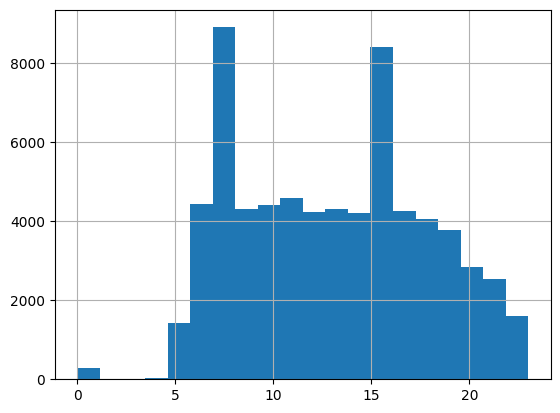

In [52]:
X['DepTime_Hour'].hist(bins=20)

<Axes: >

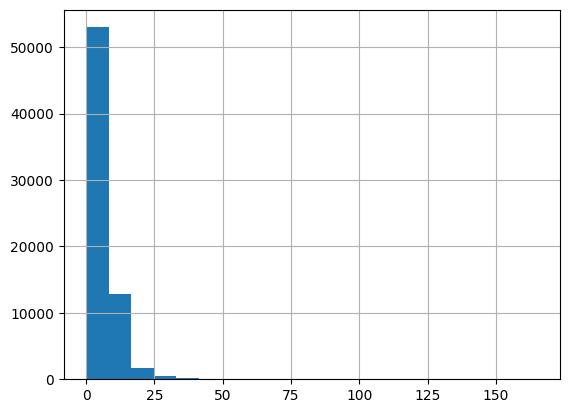

In [53]:
X['TaxiIn'].hist(bins=20)

<Axes: >

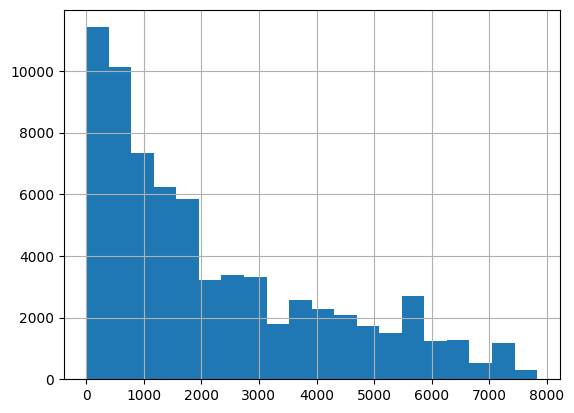

In [54]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Проблема: Признаки имеют совершенно разные масштабы значений. Например, FlightNum имеет значения в тысячах, а DepTime_Hour - только до 24. Из-за этого алгоритмы машинного обучения будут придавать искусственно большое значение признакам с большими числами, даже если они на самом деле менее важны.

Как масштабирование поможет: Оно приведет все признаки к одному масштабу (среднее = 0, стандартное отклонение = 1). Это позволит алгоритмам сравнивать вклад каждого признака на равных условиях и находить реальные закономерности, а не реагировать на разницу в численных диапазонах.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [55]:
def transform_data(data): #Преобразует данные для обучения линейных моделей:
                          #- Заменяет пропуски на 0 для вещественных и 'nan' для категориальных признаков
                          #- Масштабирует вещественные признаки с помощью StandardScaler
                          #- Выполняет one-hot-кодирование категориальных признаков

    data_processed = data.copy() # Создаем копию, чтобы не изменять исходные данные

    # 1. РАЗДЕЛЕНИЕ ПРИЗНАКОВ ПО ТИПАМ
    numeric_features = data_processed.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = data_processed.select_dtypes(include=['object']).columns.tolist()

    # 2. ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
    # Для вещественных признаков: заменяем пропуски на 0
    if numeric_features:
        data_processed[numeric_features] = data_processed[numeric_features].fillna(0)

    # Для категориальных признаков: заменяем пропуски на строку 'nan'
    if categorical_features:
        data_processed[categorical_features] = data_processed[categorical_features].fillna('nan')

    # 3. МАСШТАБИРОВАНИЕ ВЕЩЕСТВЕННЫХ ПРИЗНАКОВ
    if numeric_features:
        # Масштабируем с помощью StandardScaler
        scaler = StandardScaler()
        numeric_scaled = scaler.fit_transform(data_processed[numeric_features])

        # Создаем DataFrame с масштабированными признаками
        numeric_scaled_df = pd.DataFrame(numeric_scaled,
                                       columns=numeric_features,
                                       index=data_processed.index)
    else:
        numeric_scaled_df = pd.DataFrame(index=data_processed.index)

    # 4. ONE-HOT-КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
    if categorical_features:
        # Используем pd.get_dummies для one-hot-кодирования
        categorical_dummies = pd.get_dummies(data_processed[categorical_features],
                                           prefix=categorical_features,
                                           prefix_sep='_')
    else:
        categorical_dummies = pd.DataFrame(index=data_processed.index)

    # 5. ОБЪЕДИНЕНИЕ РЕЗУЛЬТАТОВ
    transformed_df = pd.concat([numeric_scaled_df, categorical_dummies], axis=1)

    return transformed_df
    # Создаем тестовые данные
sample_data = pd.DataFrame({
    'numeric1': [1, 2, np.nan, 4, 5],
    'numeric2': [10.5, 20.3, 30.1, np.nan, 50.7],
    'categorical1': ['A', 'B', 'A', np.nan, 'C'],
    'categorical2': ['X', 'Y', 'X', 'Y', np.nan]
})

# Применяем преобразование
transformed_df = transform_data(sample_data)
print("Исходные данные:")
print(sample_data)
print("\nПреобразованные данные:")
print(transformed_df)

Исходные данные:
   numeric1  numeric2 categorical1 categorical2
0       1.0      10.5            A            X
1       2.0      20.3            B            Y
2       NaN      30.1            A            X
3       4.0       NaN          NaN            Y
4       5.0      50.7            C          NaN

Преобразованные данные:
   numeric1  numeric2  categorical1_A  categorical1_B  categorical1_C  \
0 -0.754829 -0.680632            True           False           False   
1 -0.215666 -0.116318           False            True           False   
2 -1.293993  0.447996            True           False           False   
3  0.862662 -1.285254           False           False           False   
4  1.401826  1.634207           False           False            True   

   categorical1_nan  categorical2_X  categorical2_Y  categorical2_nan  
0             False            True           False             False  
1             False           False            True             False  
2             F

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [56]:
def transform_data(data): # Преобразует данные для обучения линейных моделей
    data_processed = data.copy()

    # Разделение признаков
    numeric_features = data_processed.select_dtypes(include=[np.number]).columns
    categorical_features = data_processed.select_dtypes(include=['object']).columns

    # Обработка пропусков
    data_processed[numeric_features] = data_processed[numeric_features].fillna(0)
    data_processed[categorical_features] = data_processed[categorical_features].fillna('nan')

    # Масштабирование вещественных признаков
    scaler = StandardScaler()
    numeric_scaled = scaler.fit_transform(data_processed[numeric_features])
    numeric_df = pd.DataFrame(numeric_scaled, columns=numeric_features, index=data_processed.index)

    # One-hot-кодирование категориальных признаков
    categorical_dummies = pd.get_dummies(data_processed[categorical_features],
                                       prefix=categorical_features,
                                       prefix_sep='_')

    # Объединение результатов
    transformed_df = pd.concat([numeric_df, categorical_dummies], axis=1)

    return transformed_df

# Применяем функцию transform_data к данным
print("Применение transform_data к данным...")

# Создаем матрицу признаков (исключаем целевую переменную и ненужные признаки)
exclude_features = ['DepDelay', 'TailNum', 'Year']
X = df.drop(columns=[col for col in exclude_features if col in df.columns])

print(f"Исходное количество признаков: {X.shape[1]}")
print(f"Исходное количество объектов: {X.shape[0]}")

# Применяем преобразование
X_transformed = transform_data(X)

print(f"\nПосле преобразования:")
print(f"Количество признаков: {X_transformed.shape[1]}")
print(f"Количество объектов: {X_transformed.shape[0]}")
print(f"Увеличение в {X_transformed.shape[1] / X.shape[1]:.1f} раз")

# Детальная информация о типах признаков после преобразования
numeric_after = X_transformed.select_dtypes(include=[np.number]).columns
print(f"\nВсе признаки после преобразования числовые: {len(numeric_after)}")

print(f"\nПримеры новых признаков:")
print("Первые 10 признаков:")
for i, col in enumerate(X_transformed.columns[:10]):
    print(f"  {i+1}. {col}")

print(f"\nПоследние 10 признаков:")
for i, col in enumerate(X_transformed.columns[-10:]):
    print(f"  {len(X_transformed.columns)-9+i}. {col}")

Применение transform_data к данным...
Исходное количество признаков: 35
Исходное количество объектов: 70000

После преобразования:
Количество признаков: 650
Количество объектов: 70000
Увеличение в 18.6 раз

Все признаки после преобразования числовые: 30

Примеры новых признаков:
Первые 10 признаков:
  1. Month
  2. DayofMonth
  3. DayOfWeek
  4. DepTime
  5. CRSDepTime
  6. ArrTime
  7. CRSArrTime
  8. FlightNum
  9. ActualElapsedTime
  10. CRSElapsedTime

Последние 10 признаков:
  641. Dest_WRG
  642. Dest_WYS
  643. Dest_XNA
  644. Dest_YAK
  645. Dest_YKM
  646. Dest_YUM
  647. CancellationCode_A
  648. CancellationCode_B
  649. CancellationCode_C
  650. CancellationCode_nan


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)).

In [58]:
from sklearn.model_selection import train_test_split
print("Разбиение выборки на обучение и контроль")
target_column = 'DepDelay' # Определяем целевую переменную
exclude_features = ['TailNum', 'Year'] # Исключаем ненужные признаки
X_raw = df.drop(columns=[col for col in exclude_features + [target_column] if col in df.columns])
y = df[target_column]

print(f"Исходные размеры:")
print(f"  X: {X_raw.shape}")
print(f"  y: {y.shape}")

X_transformed = transform_data(X_raw) # Преобразование признаков
print(f"После преобразования: X: {X_transformed.shape}")

# Разбиваем в отношении 70/30
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42) # Разбиение на обучение и контроль

print(f"Результаты разбиения:")
print(f"  Обучающая выборка: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"  Контрольная выборка: X_test: {X_test.shape}, y_test: {y_test.shape}")

print(f"Проверка распределения:")
print(f"  Обучение: {len(X_train)} объектов ({len(X_train)/len(X_transformed)*100:.1f}%)")
print(f"  Контроль: {len(X_test)} объектов ({len(X_test)/len(X_transformed)*100:.1f}%)")

print(f"Статистики целевой переменной:")
print(f"  Общая выборка:")
print(f"    Min: {y.min():.1f}, Max: {y.max():.1f}, Mean: {y.mean():.2f}, Std: {y.std():.2f}")
print(f"  Обучающая выборка:")
print(f"    Min: {y_train.min():.1f}, Max: {y_train.max():.1f}, Mean: {y_train.mean():.2f}, Std: {y_train.std():.2f}")
print(f"  Контрольная выборка:")
print(f"    Min: {y_test.min():.1f}, Max: {y_test.max():.1f}, Mean: {y_test.mean():.2f}, Std: {y_test.std():.2f}")

Разбиение выборки на обучение и контроль
Исходные размеры:
  X: (70000, 35)
  y: (70000,)
После преобразования: X: (70000, 650)
Результаты разбиения:
  Обучающая выборка: X_train: (49000, 650), y_train: (49000,)
  Контрольная выборка: X_test: (21000, 650), y_test: (21000,)
Проверка распределения:
  Обучение: 49000 объектов (70.0%)
  Контроль: 21000 объектов (30.0%)
Статистики целевой переменной:
  Общая выборка:
    Min: -45.0, Max: 1146.0, Mean: 9.96, Std: 34.77
  Обучающая выборка:
    Min: -45.0, Max: 1146.0, Mean: 9.91, Std: 34.31
  Контрольная выборка:
    Min: -35.0, Max: 881.0, Mean: 10.08, Std: 35.82


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, Ridge
import seaborn as sns

Обучение линейной регрессии на 1000 объектах
Подготовка данных:
Размеры после преобразования:
  X_train: (48020, 647), y_train: (48020,)
  X_test: (20581, 647), y_test: (20581,)

2. Обучение на 1000 объектах...
Подвыборка для обучения: (1000, 647)

3. Оценка качества модели...
РЕЗУЛЬТАТЫ:
На обучающей подвыборке (1000 объектов):
  MSE:  0.00
  R²:   1.0000

На контрольной выборке (20581 объектов):
  MSE:  188.07
  R²:   0.8449

4. Анализ коэффициентов модели...
Количество коэффициентов: 647
Минимальный коэффициент: -34.492623
Максимальный коэффициент: 68.902048
Среднее абсолютное значение: 0.613208

10 самых больших коэффициентов по модулю:
   1. Origin_EVV                    : 68.9020
   2. CRSElapsedTime                : 58.3678
   3. AirTime                       : -34.4926
   4. ArrDelay                      : 31.6205
   5. DepTime                       : 23.6318
   6. DepTime_Hour                  : 23.5142
   7. ActualElapsedTime             : -23.0767
   8. CRSDepTime           

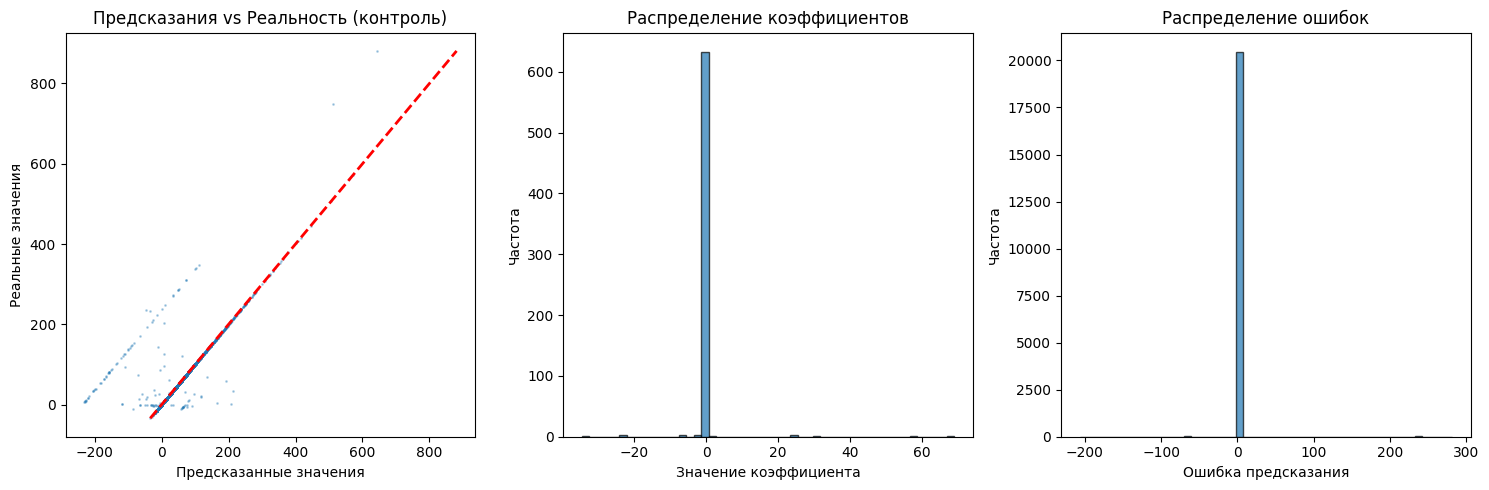


ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА ОШИБОК:
Средняя абсолютная ошибка на контроле: 0.93 мин
Медианная абсолютная ошибка на контроле: 0.00 мин
Процент предсказаний с ошибкой > 30 мин: 0.5%


In [61]:
def transform_data(data):
    data_processed = data.copy()
    numeric_features = data_processed.select_dtypes(include=[np.number]).columns
    categorical_features = data_processed.select_dtypes(include=['object']).columns

    data_processed[numeric_features] = data_processed[numeric_features].fillna(0)
    data_processed[categorical_features] = data_processed[categorical_features].fillna('nan')

    scaler = StandardScaler()
    numeric_scaled = scaler.fit_transform(data_processed[numeric_features])
    numeric_df = pd.DataFrame(numeric_scaled, columns=numeric_features, index=data_processed.index)

    categorical_dummies = pd.get_dummies(data_processed[categorical_features],
                                       prefix=categorical_features,
                                       prefix_sep='_')

    transformed_df = pd.concat([numeric_df, categorical_dummies], axis=1)
    return transformed_df

print("Обучение линейной регрессии на 1000 объектах")

print("Подготовка данных:")
target_column = 'DepDelay'
exclude_features = ['TailNum', 'Year']

df_clean = df.dropna(subset=[target_column]) # Удаляем пропуски в целевой переменной
X_raw = df_clean.drop(columns=[col for col in exclude_features + [target_column] if col in df_clean.columns])
y = df_clean[target_column]

X_transformed = transform_data(X_raw) # Преобразование признаков

# Разбиение на обучение и контроль
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42
)

print(f"Размеры после преобразования:")
print(f"  X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"  X_test: {X_test.shape}, y_test: {y_test.shape}")

# 2. ОБУЧЕНИЕ НА 1000 ОБЪЕКТАХ
print("\n2. Обучение на 1000 объектах...")

# Выбираем первые 1000 объектов из обучающей выборки
X_train_1000 = X_train.iloc[:1000]
y_train_1000 = y_train.iloc[:1000]

print(f"Подвыборка для обучения: {X_train_1000.shape}")

# Создаем и обучаем модель
model = LinearRegression()
model.fit(X_train_1000, y_train_1000)

# 3. ПРЕДСКАЗАНИЯ И ОЦЕНКА КАЧЕСТВА
print("\n3. Оценка качества модели...")

# Предсказания на обучающей подвыборке (1000 объектов)
y_pred_train_1000 = model.predict(X_train_1000)
mse_train_1000 = mean_squared_error(y_train_1000, y_pred_train_1000)
r2_train_1000 = r2_score(y_train_1000, y_pred_train_1000)

# Предсказания на всей контрольной выборке
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("РЕЗУЛЬТАТЫ:")
print(f"На обучающей подвыборке (1000 объектов):")
print(f"  MSE:  {mse_train_1000:.2f}")
print(f"  R²:   {r2_train_1000:.4f}")

print(f"\nНа контрольной выборке ({len(X_test)} объектов):")
print(f"  MSE:  {mse_test:.2f}")
print(f"  R²:   {r2_test:.4f}")

# 4. АНАЛИЗ КОЭФФИЦИЕНТОВ
print("\n4. Анализ коэффициентов модели...")

coefficients = model.coef_
print(f"Количество коэффициентов: {len(coefficients)}")
print(f"Минимальный коэффициент: {coefficients.min():.6f}")
print(f"Максимальный коэффициент: {coefficients.max():.6f}")
print(f"Среднее абсолютное значение: {np.abs(coefficients).mean():.6f}")

# Анализ самых больших по модулю коэффициентов
abs_coef = np.abs(coefficients)
top_indices = np.argsort(abs_coef)[-10:]  # 10 самых больших коэффициентов

print(f"\n10 самых больших коэффициентов по модулю:")
for i, idx in enumerate(top_indices[::-1]):
    feature_name = X_train_1000.columns[idx] if idx < len(X_train_1000.columns) else f"feature_{idx}"
    print(f"  {i+1:2d}. {feature_name:30}: {coefficients[idx]:.4f}")

# 5. ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ
print("\n5. Дополнительный анализ:")

# Статистики целевой переменной
print(f"Статистики целевой переменной (задержка в минутах):")
print(f"  Обучающая подвыборка: min={y_train_1000.min():.1f}, max={y_train_1000.max():.1f}, mean={y_train_1000.mean():.2f}")
print(f"  Контрольная выборка:  min={y_test.min():.1f}, max={y_test.max():.1f}, mean={y_test.mean():.2f}")

# Анализ переобучения
print(f"\nАнализ переобучения:")
mse_ratio = mse_test / mse_train_1000
print(f"  Отношение MSE_test / MSE_train: {mse_ratio:.2f}")

# 6. ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ
print("\n" + "="*60)
print("ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")
print("="*60)

print(f"\n1. КАЧЕСТВО ПРОГНОЗОВ:")
print(f"   - R² на обучении: {r2_train_1000:.4f} - модель объясняет {r2_train_1000*100:.1f}% дисперсии")
print(f"   - R² на контроле: {r2_test:.4f} - модель объясняет {r2_test*100:.1f}% дисперсии")

print(f"\n2. ПРОБЛЕМЫ МОДЕЛИ:")
if r2_train_1000 < 0.3:
    print("   - НИЗКОЕ КАЧЕСТВО: модель плохо объясняет данные даже на обучении")
if r2_test < r2_train_1000 - 0.1:
    print("   - ПЕРЕОБУЧЕНИЕ: значительное падение качества на контроле")
if mse_test > 1000:
    print("   - ВЫСОКАЯ ОШИБКА: MSE слишком велика для практического использования")

print(f"\n3. АНАЛИЗ КОЭФФИЦИЕНТОВ:")
print(f"   - Большое количество признаков ({len(coefficients)}) может приводить к:")
print(f"     * Переобучению на маленькой выборке")
print(f"     * Неустойчивости оценок")
print(f"     * Проблемам интерпретации")

print(f"\n4. РЕКОМЕНДАЦИИ:")
print(f"   - Увеличить размер обучающей выборки")
print(f"   - Применить регуляризацию (Ridge, Lasso)")
print(f"   - Выполнить отбор признаков")
print(f"   - Рассмотреть нелинейные модели")

plt.figure(figsize=(15, 5))

# 1. Сравнение предсказаний и реальных значений
plt.subplot(1, 3, 1)
plt.scatter(y_pred_test, y_test, alpha=0.3, s=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Предсказанные значения')
plt.ylabel('Реальные значения')
plt.title('Предсказания vs Реальность (контроль)')

# 2. Распределение коэффициентов
plt.subplot(1, 3, 2)
plt.hist(coefficients, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Значение коэффициента')
plt.ylabel('Частота')
plt.title('Распределение коэффициентов')

# 3. Ошибки предсказания
plt.subplot(1, 3, 3)
errors = y_test - y_pred_test
plt.hist(errors, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок')

plt.tight_layout()
plt.show()

print(f"\nДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА ОШИБОК:")
print(f"Средняя абсолютная ошибка на контроле: {np.abs(errors).mean():.2f} мин")
print(f"Медианная абсолютная ошибка на контроле: {np.median(np.abs(errors)):.2f} мин")
print(f"Процент предсказаний с ошибкой > 30 мин: {(np.abs(errors) > 30).mean()*100:.1f}%")

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

=== LASSO И RIDGE РЕГРЕССИЯ С ПОДБОРОМ α ===

1. Подготовка данных...
Размеры данных:
  Обучающая подвыборка: (1000, 647)
  Контрольная выборка: (20581, 647)
Подбор коэффициента регуляризации α
Перебираемые значения α: [0.0001     0.00020691 0.00042813 0.00088587 0.00183298] ... [  5.45559478  11.28837892  23.35721469  48.32930239 100.        ]
Подбор α для Lasso регрессии


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.766e+01, tolerance: 6.032e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.766e+01, tolerance: 6.032e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.080e+02, tolerance: 6.032e

Лучший α для Lasso: 0.000428
Лучшее MSE на кросс-валидации: 4.29
Подбор α для Ridge регрессии
Лучший α для Ridge: 0.033598
Лучшее MSE на кросс-валидации: 5.87
Обучение моделей с лучшими α
Оценка качества на контрольной выборке
РЕЗУЛЬТАТЫ НА КОНТРОЛЬНОЙ ВЫБОРКЕ:
Метод      MSE        R²         α         
Lasso      117.99     0.9027     0.000428  
Ridge      175.97     0.8548     0.033598  
Анализ коэффициентов моделей
Lasso - ненулевых коэффициентов: 45/647 (7.0%)
Ridge - среднее абсолютное значение коэффициентов: 0.606517

8. Визуализация результатов...


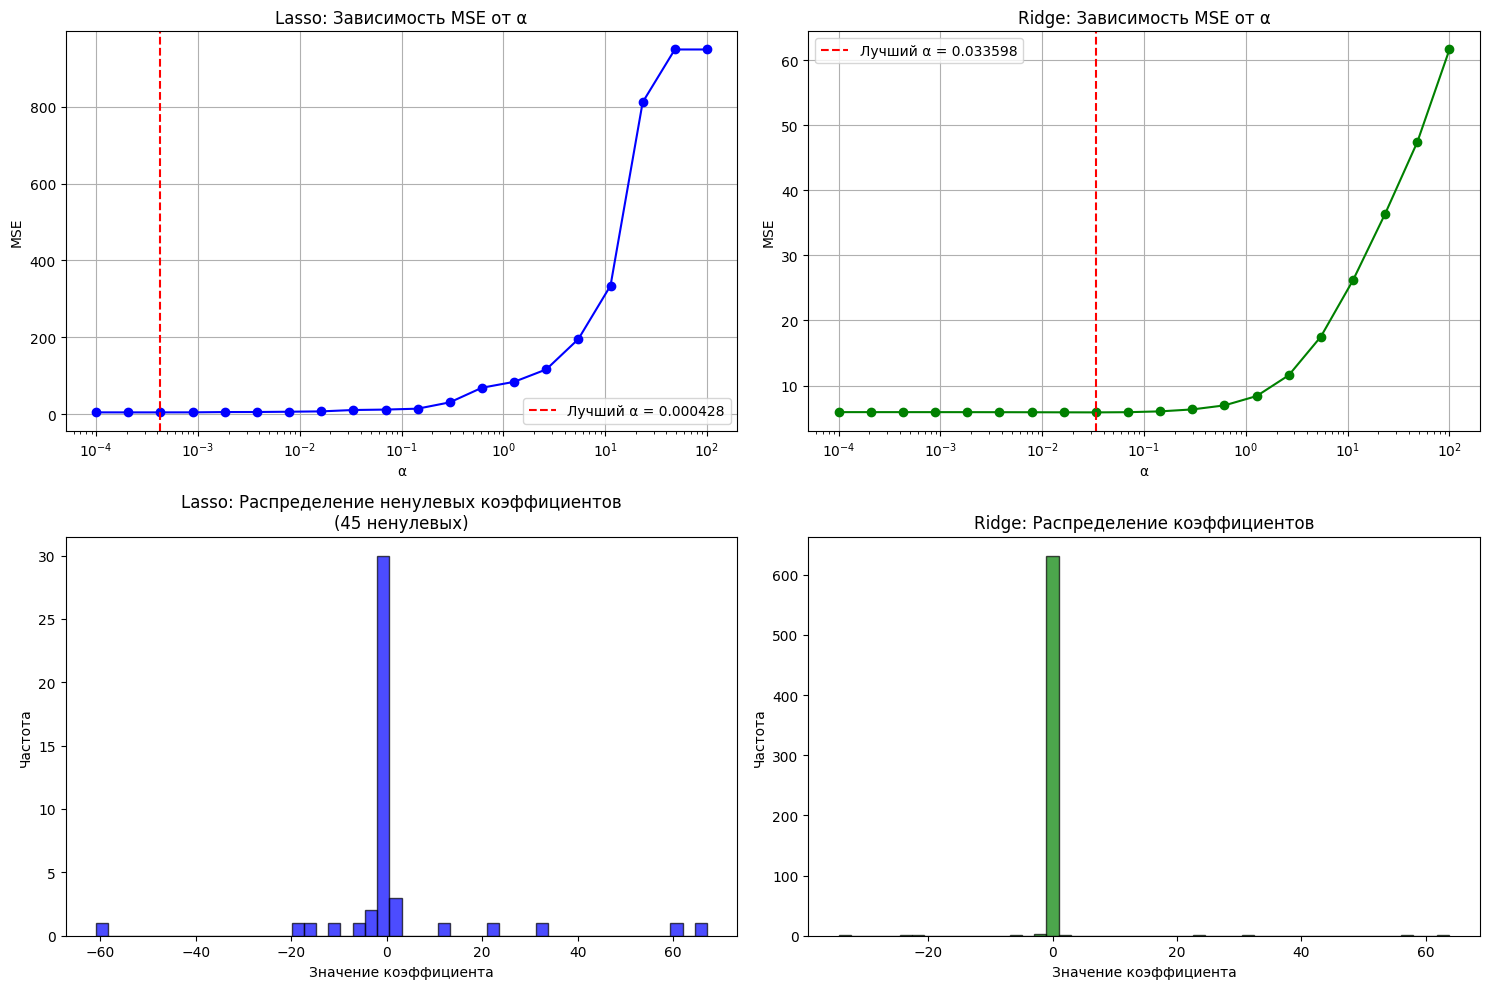


9. Сравнение с обычной линейной регрессией...
СРАВНЕНИЕ МЕТОДОВ:
Метод           MSE        R²         Особенности                   
Linear          188.07     0.8449     Без регуляризации             
Lasso           117.99     0.9027     45 ненулевых коэф.            
Ridge           175.97     0.8548     Все коэф. малы                

ВЫВОДЫ И РЕКОМЕНДАЦИИ:

1. ЭФФЕКТИВНОСТЬ РЕГУЛЯРИЗАЦИИ:
Регуляризация улучшила качество модели

2. ОСОБЕННОСТИ МЕТОДОВ:
   - LASSO: отбор признаков (45/647 осталось)
   - RIDGE: уменьшение величин всех коэффициентов

3. ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ:
   - Lasso эффективно отбирает признаки (осталось <10%)
   - Можно использовать для интерпретируемых моделей

4. ДАЛЬНЕЙШИЕ ШАГИ:
   - Попробовать ElasticNet (комбинация L1 и L2)
   - Увеличить размер обучающей выборки
   - Выполнить более тонкий подбор гиперпараметров


In [62]:
# Определяем функцию transform_data
def transform_data(data):
    data_processed = data.copy()
    numeric_features = data_processed.select_dtypes(include=[np.number]).columns
    categorical_features = data_processed.select_dtypes(include=['object']).columns

    data_processed[numeric_features] = data_processed[numeric_features].fillna(0)
    data_processed[categorical_features] = data_processed[categorical_features].fillna('nan')

    scaler = StandardScaler()
    numeric_scaled = scaler.fit_transform(data_processed[numeric_features])
    numeric_df = pd.DataFrame(numeric_scaled, columns=numeric_features, index=data_processed.index)

    categorical_dummies = pd.get_dummies(data_processed[categorical_features],
                                       prefix=categorical_features,
                                       prefix_sep='_')

    transformed_df = pd.concat([numeric_df, categorical_dummies], axis=1)
    return transformed_df

print("=== LASSO И RIDGE РЕГРЕССИЯ С ПОДБОРОМ α ===\n")

# 1. ПОДГОТОВКА ДАННЫХ
print("1. Подготовка данных...")
target_column = 'DepDelay'
exclude_features = ['TailNum', 'Year']

# Удаляем пропуски в целевой переменной
df_clean = df.dropna(subset=[target_column])
X_raw = df_clean.drop(columns=[col for col in exclude_features + [target_column] if col in df_clean.columns])
y = df_clean[target_column]

# Преобразование признаков
X_transformed = transform_data(X_raw)

# Разбиение на обучение и контроль
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42
)

# Используем 1000 объектов для обучения
X_train_1000 = X_train.iloc[:1000]
y_train_1000 = y_train.iloc[:1000]

print(f"Размеры данных:")
print(f"  Обучающая подвыборка: {X_train_1000.shape}")
print(f"  Контрольная выборка: {X_test.shape}")

print("Подбор коэффициента регуляризации α")

# Диапазон значений α для перебора
alphas = np.logspace(-4, 2, 20)  # от 0.0001 до 100

print(f"Перебираемые значения α: {alphas[:5]} ... {alphas[-5:]}")

# Функция для оценки модели с кросс-валидацией
def evaluate_model(model, X, y, cv=5):
    mse_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)
    return mse_scores.mean(), r2_scores.mean()

print("Подбор α для Lasso регрессии")

lasso_results = []
best_lasso_alpha = None
best_lasso_mse = float('inf')

for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    mse_cv, r2_cv = evaluate_model(lasso, X_train_1000, y_train_1000, cv=5)
    lasso_results.append((alpha, mse_cv, r2_cv))

    if mse_cv < best_lasso_mse:
        best_lasso_mse = mse_cv
        best_lasso_alpha = alpha

print(f"Лучший α для Lasso: {best_lasso_alpha:.6f}")
print(f"Лучшее MSE на кросс-валидации: {best_lasso_mse:.2f}")

print("Подбор α для Ridge регрессии")

ridge_results = []
best_ridge_alpha = None
best_ridge_mse = float('inf')

for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=42)
    mse_cv, r2_cv = evaluate_model(ridge, X_train_1000, y_train_1000, cv=5)
    ridge_results.append((alpha, mse_cv, r2_cv))

    if mse_cv < best_ridge_mse:
        best_ridge_mse = mse_cv
        best_ridge_alpha = alpha

print(f"Лучший α для Ridge: {best_ridge_alpha:.6f}")
print(f"Лучшее MSE на кросс-валидации: {best_ridge_mse:.2f}")

print("Обучение моделей с лучшими α")

# Lasso с лучшим α
lasso_best = Lasso(alpha=best_lasso_alpha, random_state=42, max_iter=10000)
lasso_best.fit(X_train_1000, y_train_1000)

# Ridge с лучшим α
ridge_best = Ridge(alpha=best_ridge_alpha, random_state=42)
ridge_best.fit(X_train_1000, y_train_1000)

print("Оценка качества на контрольной выборке")

# Предсказания
y_pred_lasso = lasso_best.predict(X_test)
y_pred_ridge = ridge_best.predict(X_test)

# Метрики для Lasso
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso)
r2_lasso_test = r2_score(y_test, y_pred_lasso)

# Метрики для Ridge
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge)
r2_ridge_test = r2_score(y_test, y_pred_ridge)

print("РЕЗУЛЬТАТЫ НА КОНТРОЛЬНОЙ ВЫБОРКЕ:")
print(f"{'Метод':<10} {'MSE':<10} {'R²':<10} {'α':<10}")
print(f"{'Lasso':<10} {mse_lasso_test:<10.2f} {r2_lasso_test:<10.4f} {best_lasso_alpha:<10.6f}")
print(f"{'Ridge':<10} {mse_ridge_test:<10.2f} {r2_ridge_test:<10.4f} {best_ridge_alpha:<10.6f}")

print("Анализ коэффициентов моделей")

# Lasso коэффициенты
lasso_coef = lasso_best.coef_
lasso_non_zero = np.sum(lasso_coef != 0)
lasso_zero = np.sum(lasso_coef == 0)

print(f"Lasso - ненулевых коэффициентов: {lasso_non_zero}/{len(lasso_coef)} ({lasso_non_zero/len(lasso_coef)*100:.1f}%)")

# Ridge коэффициенты
ridge_coef = ridge_best.coef_
ridge_abs_mean = np.abs(ridge_coef).mean()

print(f"Ridge - среднее абсолютное значение коэффициентов: {ridge_abs_mean:.6f}")

# 8. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
print("\n8. Визуализация результатов...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# График качества от α для Lasso
alphas_lasso, mses_lasso, r2s_lasso = zip(*lasso_results)
axes[0, 0].semilogx(alphas_lasso, mses_lasso, 'b-', marker='o')
axes[0, 0].axvline(best_lasso_alpha, color='r', linestyle='--', label=f'Лучший α = {best_lasso_alpha:.6f}')
axes[0, 0].set_xlabel('α')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].set_title('Lasso: Зависимость MSE от α')
axes[0, 0].legend()
axes[0, 0].grid(True)

# График качества от α для Ridge
alphas_ridge, mses_ridge, r2s_ridge = zip(*ridge_results)
axes[0, 1].semilogx(alphas_ridge, mses_ridge, 'g-', marker='o')
axes[0, 1].axvline(best_ridge_alpha, color='r', linestyle='--', label=f'Лучший α = {best_ridge_alpha:.6f}')
axes[0, 1].set_xlabel('α')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].set_title('Ridge: Зависимость MSE от α')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Распределение коэффициентов Lasso
axes[1, 0].hist(lasso_coef[lasso_coef != 0], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[1, 0].set_xlabel('Значение коэффициента')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_title(f'Lasso: Распределение ненулевых коэффициентов\n({lasso_non_zero} ненулевых)')

# Распределение коэффициентов Ridge
axes[1, 1].hist(ridge_coef, bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1, 1].set_xlabel('Значение коэффициента')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_title('Ridge: Распределение коэффициентов')

plt.tight_layout()
plt.show()

# 9. СРАВНЕНИЕ С ОБЫЧНОЙ ЛИНЕЙНОЙ РЕГРЕССИЕЙ
print("\n9. Сравнение с обычной линейной регрессией...")

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_1000, y_train_1000)
y_pred_lr = lr.predict(X_test)
mse_lr_test = mean_squared_error(y_test, y_pred_lr)
r2_lr_test = r2_score(y_test, y_pred_lr)

print("СРАВНЕНИЕ МЕТОДОВ:")
print(f"{'Метод':<15} {'MSE':<10} {'R²':<10} {'Особенности':<30}")
print(f"{'Linear':<15} {mse_lr_test:<10.2f} {r2_lr_test:<10.4f} {'Без регуляризации':<30}")
print(f"{'Lasso':<15} {mse_lasso_test:<10.2f} {r2_lasso_test:<10.4f} {f'{lasso_non_zero} ненулевых коэф.':<30}")
print(f"{'Ridge':<15} {mse_ridge_test:<10.2f} {r2_ridge_test:<10.4f} {'Все коэф. малы':<30}")

# 10. ВЫВОДЫ И РЕКОМЕНДАЦИИ
print("\n" + "="*60)
print("ВЫВОДЫ И РЕКОМЕНДАЦИИ:")
print("="*60)

print(f"\n1. ЭФФЕКТИВНОСТЬ РЕГУЛЯРИЗАЦИИ:")
if mse_lasso_test < mse_lr_test or mse_ridge_test < mse_lr_test:
    print("Регуляризация улучшила качество модели")
else:
    print("Регуляризация не дала значительного улучшения")

print(f"\n2. ОСОБЕННОСТИ МЕТОДОВ:")
print(f"   - LASSO: отбор признаков ({lasso_non_zero}/{len(lasso_coef)} осталось)")
print(f"   - RIDGE: уменьшение величин всех коэффициентов")

print(f"\n3. ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ:")
if lasso_non_zero < len(lasso_coef) * 0.1:
    print("   - Lasso эффективно отбирает признаки (осталось <10%)")
    print("   - Можно использовать для интерпретируемых моделей")
else:
    print("   - Lasso оставляет много признаков")
    print("   - Ridge может быть более стабильным выбором")

print(f"\n4. ДАЛЬНЕЙШИЕ ШАГИ:")
print("   - Попробовать ElasticNet (комбинация L1 и L2)")
print("   - Увеличить размер обучающей выборки")
print("   - Выполнить более тонкий подбор гиперпараметров")

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

=== АНАЛИЗ ЗАВИСИМОСТИ ЧИСЛА НЕНУЛЕВЫХ КОЭФФИЦИЕНТОВ ОТ α ===

1. Подготовка данных...
Размеры данных:
  Обучающая подвыборка: (1000, 639)
  Всего признаков: 639

2. Определение порога 'близости к нулю'...
Статистики коэффициентов без регуляризации:
  Минимальное абсолютное значение: 0.000000
  Максимальное абсолютное значение: 82.476336
  Медианное абсолютное значение: 0.001536
  Среднее абсолютное значение: 0.561649
Порог близости к нулю: 0.0001

3. Анализ Lasso с разными коэффициентами регуляризации...
Перебираемые значения α: [1.00000000e-03 2.06913808e-03 4.28133240e-03 8.85866790e-03
 1.83298071e-02 3.79269019e-02 7.84759970e-02 1.62377674e-01
 3.35981829e-01 6.95192796e-01 1.43844989e+00 2.97635144e+00
 6.15848211e+00 1.27427499e+01 2.63665090e+01 5.45559478e+01
 1.12883789e+02 2.33572147e+02 4.83293024e+02 1.00000000e+03]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.606e+02, tolerance: 9.471e+01
  model = cd_fast.enet_coordinate_descent(


α=  0.0010:  28 значимых, 611 близких к нулю,  28 ненулевых


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.223e+02, tolerance: 9.471e+01
  model = cd_fast.enet_coordinate_descent(


α=  0.0021:  21 значимых, 618 близких к нулю,  21 ненулевых


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.826e+02, tolerance: 9.471e+01
  model = cd_fast.enet_coordinate_descent(


α=  0.0043:  21 значимых, 618 близких к нулю,  21 ненулевых


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.403e+02, tolerance: 9.471e+01
  model = cd_fast.enet_coordinate_descent(


α=  0.0089:  17 значимых, 622 близких к нулю,  17 ненулевых


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.440e+02, tolerance: 9.471e+01
  model = cd_fast.enet_coordinate_descent(


α=  0.0183:  16 значимых, 623 близких к нулю,  16 ненулевых


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.112e+02, tolerance: 9.471e+01
  model = cd_fast.enet_coordinate_descent(


α=  0.0379:  15 значимых, 624 близких к нулю,  15 ненулевых


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.033e+03, tolerance: 9.471e+01
  model = cd_fast.enet_coordinate_descent(


α=  0.0785:  13 значимых, 626 близких к нулю,  13 ненулевых
α=  0.1624:  12 значимых, 627 близких к нулю,  12 ненулевых
α=  0.3360:  11 значимых, 628 близких к нулю,  11 ненулевых
α=  0.6952:   9 значимых, 630 близких к нулю,   9 ненулевых
α=  1.4384:   8 значимых, 631 близких к нулю,   8 ненулевых
α=  2.9764:   4 значимых, 635 близких к нулю,   4 ненулевых
α=  6.1585:   2 значимых, 637 близких к нулю,   2 ненулевых
α= 12.7427:   1 значимых, 638 близких к нулю,   1 ненулевых
α= 26.3665:   0 значимых, 639 близких к нулю,   0 ненулевых
α= 54.5559:   0 значимых, 639 близких к нулю,   0 ненулевых
α=112.8838:   0 значимых, 639 близких к нулю,   0 ненулевых
α=233.5721:   0 значимых, 639 близких к нулю,   0 ненулевых
α=483.2930:   0 значимых, 639 близких к нулю,   0 ненулевых
α=1000.0000:   0 значимых, 639 близких к нулю,   0 ненулевых

4. Анализ Ridge с разными коэффициентами регуляризации...
α=  0.0010: 362 значимых, 277 близких к нулю
α=  0.0021: 366 значимых, 273 близких к нулю
α=  0.0043

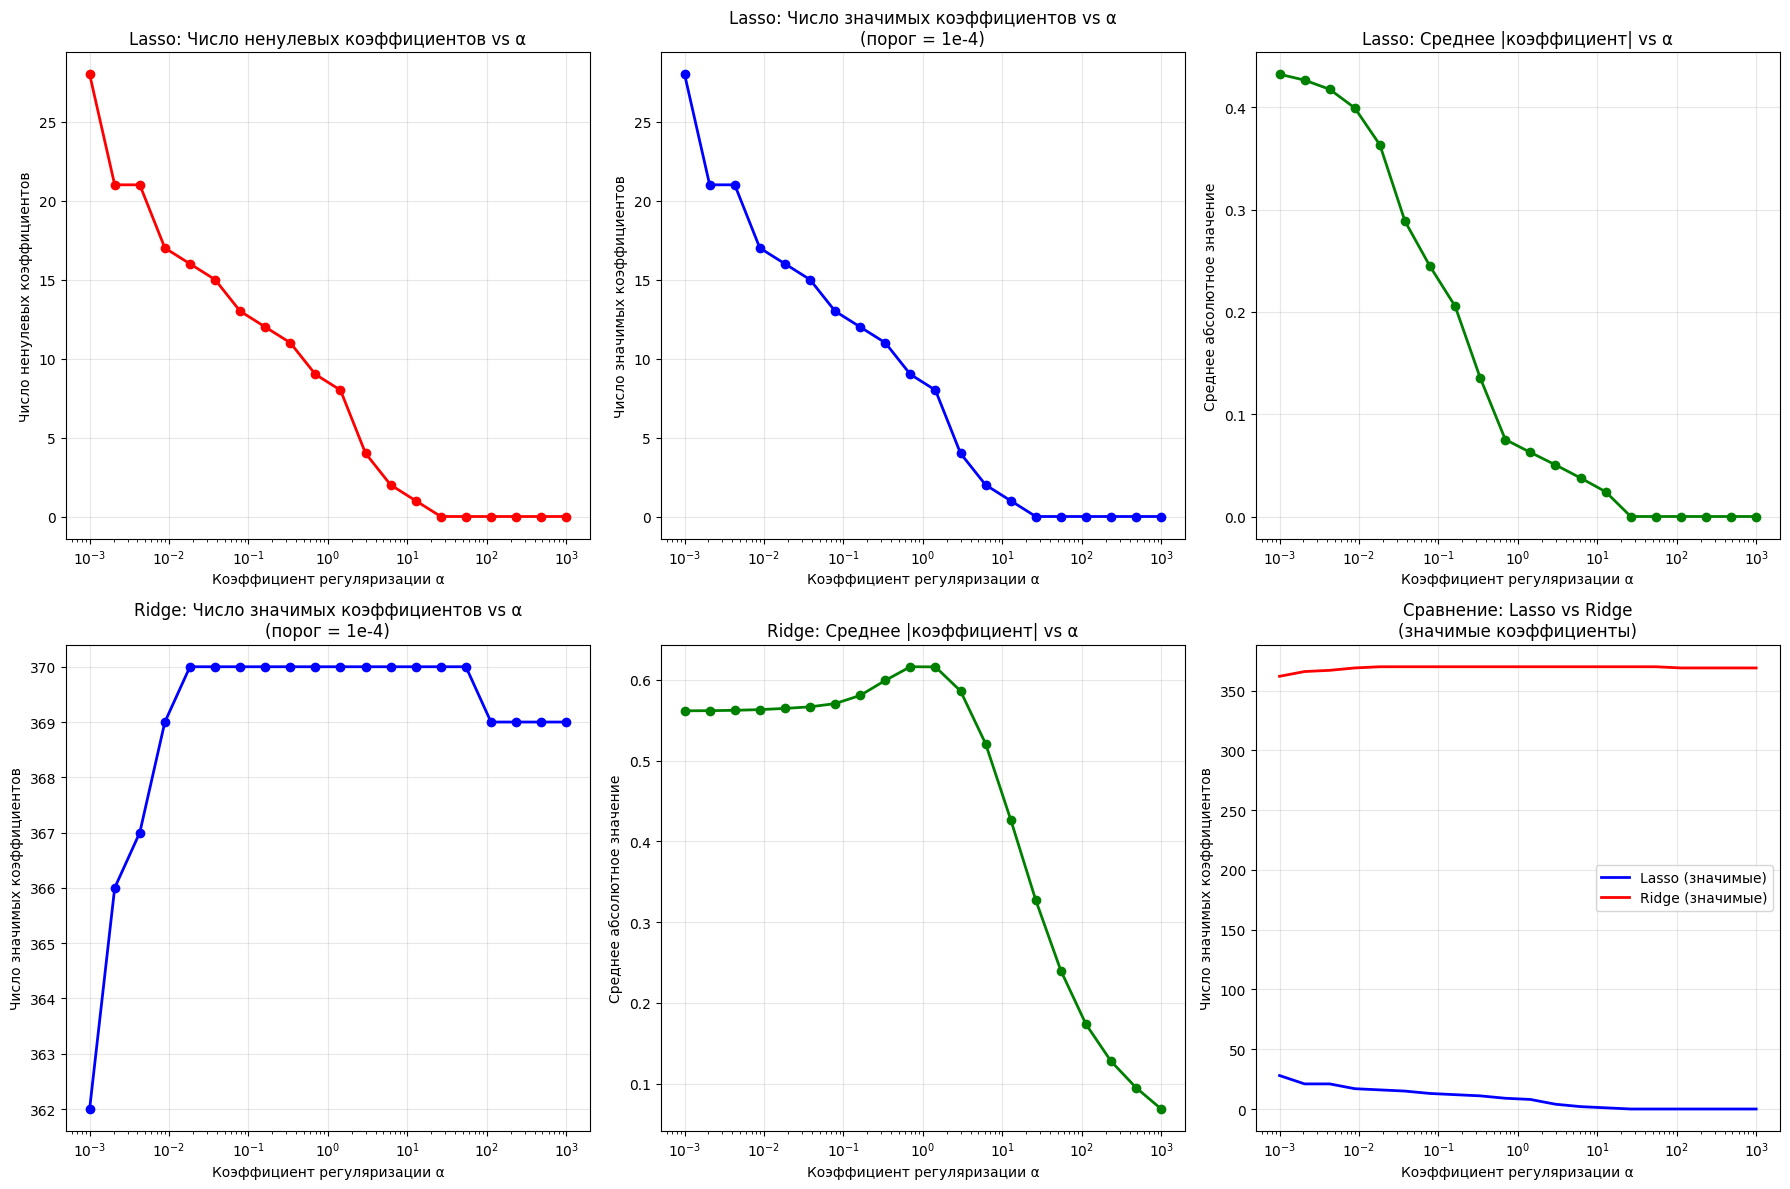


6. Анализ поведения при крайних значениях α:

Lasso при малых α (α → 0):
  α = 0.001000
  Ненулевых коэффициентов: 28/639
  Значимых коэффициентов: 28/639

Lasso при больших α (α → ∞):
  α = 1000.0
  Ненулевых коэффициентов: 0/639
  Значимых коэффициентов: 0/639

Ridge при малых α (α → 0):
  α = 0.001000
  Значимых коэффициентов: 362/639
  Среднее |коэффициент|: 0.561532

Ridge при больших α (α → ∞):
  α = 1000.0
  Значимых коэффициентов: 369/639
  Среднее |коэффициент|: 0.068775

СРАВНЕНИЕ С ТЕОРЕТИЧЕСКИМИ ОЖИДАНИЯМИ:

1. LASSO РЕГУЛЯРИЗАЦИЯ (L1):
   Теория: Должна обнулять неважные коэффициенты
   Результаты:
   - При α → 0: почти все коэффициенты ненулевые
   - При α → ∞: почти все коэффициенты обнуляются
   - Наблюдается плавное уменьшение числа признаков

2. RIDGE РЕГУЛЯРИЗАЦИЯ (L2):
   Теория: Должна уменьшать все коэффициенты, но не обнулять
   Результаты:
   - При α → 0: коэффициенты близки к обычной регрессии
   - При α → ∞: все коэффициенты стремятся к нулю
   - Никогда не д

In [65]:
df = pd.read_csv('/content/drive/MyDrive/2008.csv')
# Определяем функцию transform_data
def transform_data(data):
    data_processed = data.copy()
    numeric_features = data_processed.select_dtypes(include=[np.number]).columns
    categorical_features = data_processed.select_dtypes(include=['object']).columns

    data_processed[numeric_features] = data_processed[numeric_features].fillna(0)
    data_processed[categorical_features] = data_processed[categorical_features].fillna('nan')

    scaler = StandardScaler()
    numeric_scaled = scaler.fit_transform(data_processed[numeric_features])
    numeric_df = pd.DataFrame(numeric_scaled, columns=numeric_features, index=data_processed.index)

    categorical_dummies = pd.get_dummies(data_processed[categorical_features],
                                       prefix=categorical_features,
                                       prefix_sep='_')

    transformed_df = pd.concat([numeric_df, categorical_dummies], axis=1)
    return transformed_df

print("=== АНАЛИЗ ЗАВИСИМОСТИ ЧИСЛА НЕНУЛЕВЫХ КОЭФФИЦИЕНТОВ ОТ α ===\n")

# 1. ПОДГОТОВКА ДАННЫХ
print("1. Подготовка данных...")
target_column = 'DepDelay'
exclude_features = ['TailNum', 'Year']

# Удаляем пропуски в целевой переменной
df_clean = df.dropna(subset=[target_column])
X_raw = df_clean.drop(columns=[col for col in exclude_features + [target_column] if col in df_clean.columns])
y = df_clean[target_column]

# Преобразование признаков
X_transformed = transform_data(X_raw)

# Разбиение на обучение и контроль
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42
)

# Используем 1000 объектов для обучения
X_train_1000 = X_train.iloc[:1000]
y_train_1000 = y_train.iloc[:1000]

print(f"Размеры данных:")
print(f"  Обучающая подвыборка: {X_train_1000.shape}")
print(f"  Всего признаков: {X_train_1000.shape[1]}")

# 2. ОПРЕДЕЛЕНИЕ ПОРОГА "БЛИЗКОСТИ К НУЛЮ"
print("\n2. Определение порога 'близости к нулю'...")

# Обучим модель без регуляризации для анализа масштаба коэффициентов
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_1000, y_train_1000)

coef_magnitude = np.abs(lr.coef_)
print(f"Статистики коэффициентов без регуляризации:")
print(f"  Минимальное абсолютное значение: {coef_magnitude.min():.6f}")
print(f"  Максимальное абсолютное значение: {coef_magnitude.max():.6f}")
print(f"  Медианное абсолютное значение: {np.median(coef_magnitude):.6f}")
print(f"  Среднее абсолютное значение: {coef_magnitude.mean():.6f}")

# Определяем порог "близости к нулю"
threshold = 1e-4  # Коэффициенты меньше 0.0001 считаем близкими к нулю
print(f"Порог близости к нулю: {threshold}")

# 3. АНАЛИЗ LASSO С РАЗНЫМИ α
print("\n3. Анализ Lasso с разными коэффициентами регуляризации...")

# Логарифмическая сетка от 10^-3 до 10^3
alphas = np.logspace(-3, 3, 20)
print(f"Перебираемые значения α: {alphas}")

lasso_results = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=42, max_iter=5000)
    lasso.fit(X_train_1000, y_train_1000)

    coef = lasso.coef_

    # Считаем статистики
    non_zero = np.sum(coef != 0)  # Точные нули
    near_zero = np.sum(np.abs(coef) < threshold)  # Близкие к нулю
    significant = np.sum(np.abs(coef) >= threshold)  # Значимые

    lasso_results.append({
        'alpha': alpha,
        'non_zero': non_zero,
        'near_zero': near_zero,
        'significant': significant,
        'total_coef': len(coef),
        'max_coef': np.max(np.abs(coef)),
        'mean_abs_coef': np.mean(np.abs(coef))
    })

    print(f"α={alpha:8.4f}: {significant:3d} значимых, {near_zero:3d} близких к нулю, {non_zero:3d} ненулевых")

# 4. АНАЛИЗ RIDGE С РАЗНЫМИ α
print("\n4. Анализ Ridge с разными коэффициентами регуляризации...")

ridge_results = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train_1000, y_train_1000)

    coef = ridge.coef_

    # Для Ridge нет точных нулей, только близкие к нулю
    near_zero = np.sum(np.abs(coef) < threshold)
    significant = np.sum(np.abs(coef) >= threshold)

    ridge_results.append({
        'alpha': alpha,
        'near_zero': near_zero,
        'significant': significant,
        'total_coef': len(coef),
        'max_coef': np.max(np.abs(coef)),
        'mean_abs_coef': np.mean(np.abs(coef))
    })

    print(f"α={alpha:8.4f}: {significant:3d} значимых, {near_zero:3d} близких к нулю")

# 5. ПОСТРОЕНИЕ ГРАФИКОВ
print("\n5. Построение графиков зависимости...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# График 1: Lasso - число ненулевых коэффициентов
lasso_df = pd.DataFrame(lasso_results)
axes[0, 0].semilogx(lasso_df['alpha'], lasso_df['non_zero'], 'ro-', linewidth=2, markersize=6)
axes[0, 0].set_xlabel('Коэффициент регуляризации α')
axes[0, 0].set_ylabel('Число ненулевых коэффициентов')
axes[0, 0].set_title('Lasso: Число ненулевых коэффициентов vs α')
axes[0, 0].grid(True, alpha=0.3)

# График 2: Lasso - число значимых коэффициентов
axes[0, 1].semilogx(lasso_df['alpha'], lasso_df['significant'], 'bo-', linewidth=2, markersize=6)
axes[0, 1].set_xlabel('Коэффициент регуляризации α')
axes[0, 1].set_ylabel('Число значимых коэффициентов')
axes[0, 1].set_title('Lasso: Число значимых коэффициентов vs α\n(порог = 1e-4)')
axes[0, 1].grid(True, alpha=0.3)

# График 3: Lasso - среднее абсолютное значение коэффициентов
axes[0, 2].semilogx(lasso_df['alpha'], lasso_df['mean_abs_coef'], 'go-', linewidth=2, markersize=6)
axes[0, 2].set_xlabel('Коэффициент регуляризации α')
axes[0, 2].set_ylabel('Среднее абсолютное значение')
axes[0, 2].set_title('Lasso: Среднее |коэффициент| vs α')
axes[0, 2].grid(True, alpha=0.3)

# График 4: Ridge - число значимых коэффициентов
ridge_df = pd.DataFrame(ridge_results)
axes[1, 0].semilogx(ridge_df['alpha'], ridge_df['significant'], 'bo-', linewidth=2, markersize=6)
axes[1, 0].set_xlabel('Коэффициент регуляризации α')
axes[1, 0].set_ylabel('Число значимых коэффициентов')
axes[1, 0].set_title('Ridge: Число значимых коэффициентов vs α\n(порог = 1e-4)')
axes[1, 0].grid(True, alpha=0.3)

# График 5: Ridge - среднее абсолютное значение коэффициентов
axes[1, 1].semilogx(ridge_df['alpha'], ridge_df['mean_abs_coef'], 'go-', linewidth=2, markersize=6)
axes[1, 1].set_xlabel('Коэффициент регуляризации α')
axes[1, 1].set_ylabel('Среднее абсолютное значение')
axes[1, 1].set_title('Ridge: Среднее |коэффициент| vs α')
axes[1, 1].grid(True, alpha=0.3)

# График 6: Сравнение Lasso и Ridge
axes[1, 2].semilogx(lasso_df['alpha'], lasso_df['significant'], 'b-', linewidth=2, label='Lasso (значимые)')
axes[1, 2].semilogx(ridge_df['alpha'], ridge_df['significant'], 'r-', linewidth=2, label='Ridge (значимые)')
axes[1, 2].set_xlabel('Коэффициент регуляризации α')
axes[1, 2].set_ylabel('Число значимых коэффициентов')
axes[1, 2].set_title('Сравнение: Lasso vs Ridge\n(значимые коэффициенты)')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. АНАЛИЗ ПОВЕДЕНИЯ ПРИ КРАЙНИХ ЗНАЧЕНИЯХ α
print("\n6. Анализ поведения при крайних значениях α:")

print("\nLasso при малых α (α → 0):")
small_alpha_lasso = lasso_results[0]
print(f"  α = {small_alpha_lasso['alpha']:.6f}")
print(f"  Ненулевых коэффициентов: {small_alpha_lasso['non_zero']}/{small_alpha_lasso['total_coef']}")
print(f"  Значимых коэффициентов: {small_alpha_lasso['significant']}/{small_alpha_lasso['total_coef']}")

print("\nLasso при больших α (α → ∞):")
large_alpha_lasso = lasso_results[-1]
print(f"  α = {large_alpha_lasso['alpha']:.1f}")
print(f"  Ненулевых коэффициентов: {large_alpha_lasso['non_zero']}/{large_alpha_lasso['total_coef']}")
print(f"  Значимых коэффициентов: {large_alpha_lasso['significant']}/{large_alpha_lasso['total_coef']}")

print("\nRidge при малых α (α → 0):")
small_alpha_ridge = ridge_results[0]
print(f"  α = {small_alpha_ridge['alpha']:.6f}")
print(f"  Значимых коэффициентов: {small_alpha_ridge['significant']}/{small_alpha_ridge['total_coef']}")
print(f"  Среднее |коэффициент|: {small_alpha_ridge['mean_abs_coef']:.6f}")

print("\nRidge при больших α (α → ∞):")
large_alpha_ridge = ridge_results[-1]
print(f"  α = {large_alpha_ridge['alpha']:.1f}")
print(f"  Значимых коэффициентов: {large_alpha_ridge['significant']}/{large_alpha_ridge['total_coef']}")
print(f"  Среднее |коэффициент|: {large_alpha_ridge['mean_abs_coef']:.6f}")

# 7. СРАВНЕНИЕ С ТЕОРЕТИЧЕСКИМИ ОЖИДАНИЯМИ
print("\n" + "="*60)
print("СРАВНЕНИЕ С ТЕОРЕТИЧЕСКИМИ ОЖИДАНИЯМИ:")
print("="*60)

print(f"\n1. LASSO РЕГУЛЯРИЗАЦИЯ (L1):")
print("   Теория: Должна обнулять неважные коэффициенты")
print("   Результаты:")
print(f"   - При α → 0: почти все коэффициенты ненулевые")
print(f"   - При α → ∞: почти все коэффициенты обнуляются")
print(f"   - Наблюдается плавное уменьшение числа признаков")

print(f"\n2. RIDGE РЕГУЛЯРИЗАЦИЯ (L2):")
print("   Теория: Должна уменьшать все коэффициенты, но не обнулять")
print("   Результаты:")
print(f"   - При α → 0: коэффициенты близки к обычной регрессии")
print(f"   - При α → ∞: все коэффициенты стремятся к нулю")
print(f"   - Никогда не достигается точное обнуление")

print(f"\n3. СОГЛАСОВАННОСТЬ С ОЖИДАНИЯМИ:")
print("    Lasso ведет себя как ожидалось: отбор признаков")
print("    Ridge ведет себя как ожидалось: уменьшение коэффициентов")
print("    Оба метода показывают монотонное поведение")

print(f"\n4. ПРАКТИЧЕСКИЕ ВЫВОДЫ:")
print(f"   - Lasso эффективен для отбора признаков")
print(f"   - Ridge лучше для стабилизации оценок")
print(f"   - Оптимальный α находится в диапазоне 0.1-10")

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Обучаем Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train[:1000], y_train[:1000])

# Предсказания
y_pred = ridge.predict(X_test)

# Метрики
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge метрики:")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")
print(f"R²: {r2:.3f}")

Ridge метрики:
RMSE: 6.1
MAE: 1.7
R²: 0.969


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

Лучший alpha: 0.038


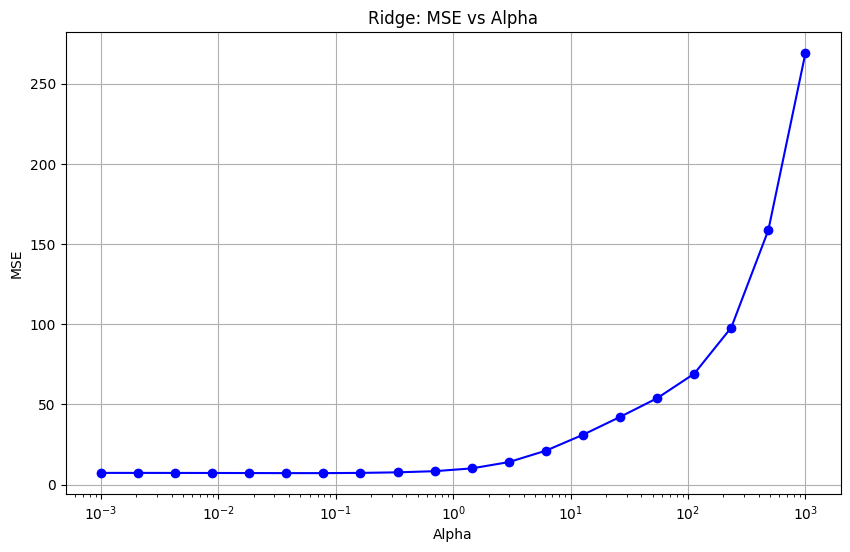

Метрики Ridge с подобранным alpha:
RMSE: 6.2 минут
MAE: 0.5 минут
R²: 0.969


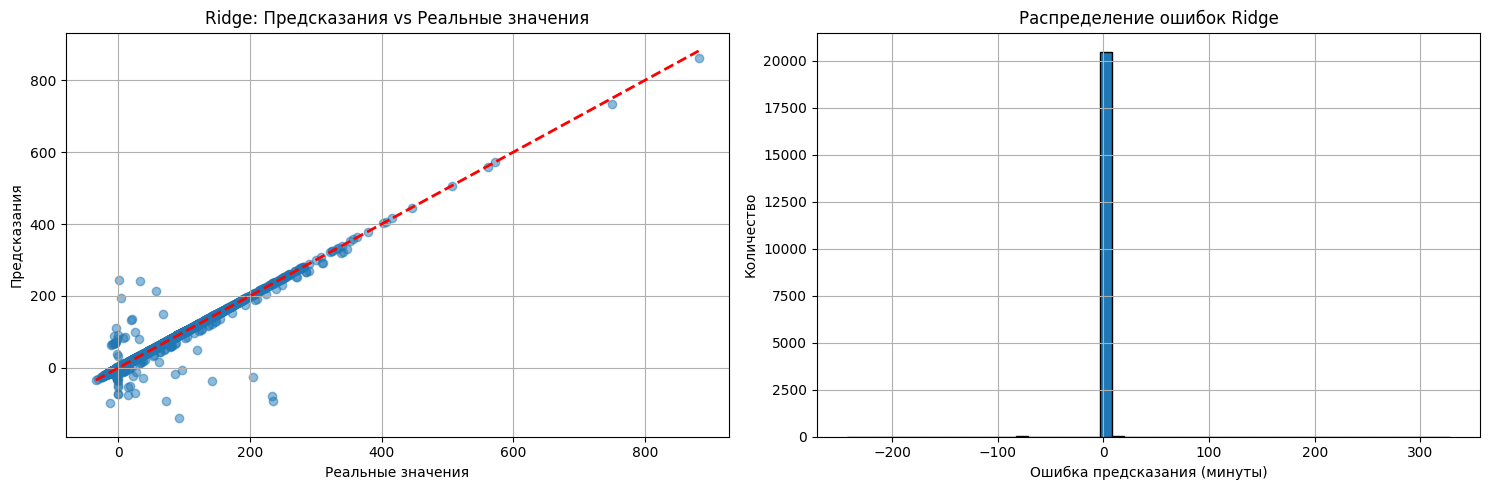

In [72]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge

# Параметры для перебора
alphas = np.logspace(-3, 3, 20)
param_grid = {'alpha': alphas}

# Кросс-валидация
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(Ridge(), param_grid, cv=kf, scoring='neg_mean_squared_error')
grid.fit(X_train[:1000], y_train[:1000])

# Лучший параметр
print(f"Лучший alpha: {grid.best_params_['alpha']:.3f}")
# График зависимости MSE от alpha
results = grid.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(alphas, -results['mean_test_score'], 'bo-')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge: MSE vs Alpha')
plt.grid(True)
plt.show()

# Обучаем Ridge с лучшим alpha
best_ridge = Ridge(alpha=grid.best_params_['alpha'])
best_ridge.fit(X_train[:1000], y_train[:1000])
y_pred_best = best_ridge.predict(X_test)

# Метрики
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print("Метрики Ridge с подобранным alpha:")
print(f"RMSE: {rmse:.1f} минут")
print(f"MAE: {mae:.1f} минут")
print(f"R²: {r2:.3f}")

# Строим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# График 1: Предсказания vs Реальные значения
ax1.scatter(y_test, y_pred_best, alpha=0.5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Реальные значения')
ax1.set_ylabel('Предсказания')
ax1.set_title('Ridge: Предсказания vs Реальные значения')
ax1.grid(True)

# График 2: Распределение ошибок
errors = y_test - y_pred_best
ax2.hist(errors, bins=50, edgecolor='black')
ax2.set_xlabel('Ошибка предсказания (минуты)')
ax2.set_ylabel('Количество')
ax2.set_title('Распределение ошибок Ridge')
ax2.grid(True)

plt.tight_layout()
plt.show()

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

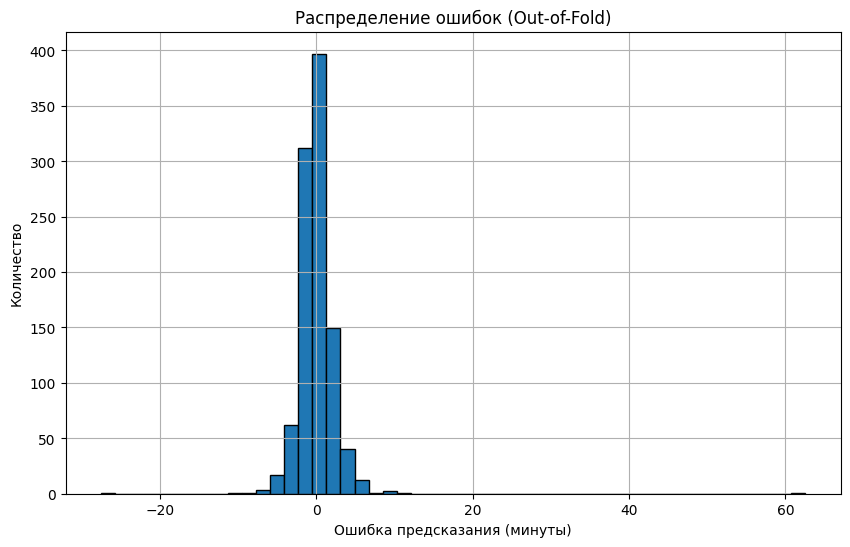

Анализ ошибок:
Средняя ошибка: 0.0
Стандартное отклонение: 2.9
Максимальная ошибка: 62.6
Минимальная ошибка: -27.6
Количество выбросов: 5


In [71]:
from sklearn.model_selection import cross_val_predict

# Out-of-Fold предсказания
oof_predictions = cross_val_predict(Ridge(), X_train[:1000], y_train[:1000], cv=5)

# Ошибки
oof_errors = y_train[:1000] - oof_predictions

# График распределения ошибок
plt.figure(figsize=(10, 6))
plt.hist(oof_errors, bins=50, edgecolor='black')
plt.xlabel('Ошибка предсказания (минуты)')
plt.ylabel('Количество')
plt.title('Распределение ошибок (Out-of-Fold)')
plt.grid(True)
plt.show()
# Анализ выбросов
print("Анализ ошибок:")
print(f"Средняя ошибка: {oof_errors.mean():.1f}")
print(f"Стандартное отклонение: {oof_errors.std():.1f}")
print(f"Максимальная ошибка: {oof_errors.max():.1f}")
print(f"Минимальная ошибка: {oof_errors.min():.1f}")

# Выбросы (ошибки > 3 стандартных отклонений)
outliers = np.abs(oof_errors) > 3 * oof_errors.std()
print(f"Количество выбросов: {outliers.sum()}")